## **1. Постановка задачи**

**Агентство недвижимости**

«Риелторы тратят катастрофически много времени на сортировку
объявлений и поиск выгодных предложений. Поэтому их скорость реакции, да
и, сказать по правде, качество анализа не дотягивают до уровня конкурентов.
Это сказывается на финансовых показателях фирмы. Задача — разработать модель, которая позволила бы обойти конкурентов по скорости и качеству совершения сделок. Сервис будет предсказывать стоимости домов на основе истории предложений.

## **2. Знакомство с данными, базовый анализ и расширение данных**

Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [5]:
# pip install -r requirements.txt

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#from scipy import statstt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection
import re

#### **2.1 Прочитаем наш файл с исходными данными:**

In [7]:
df = pd.read_csv(r'agency_data.csv')
print('df shape: {}'.format(df.shape))
df.head(5)

df shape: (377185, 18)


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [8]:
# создадим копию df
data =pd.read_csv('data.csv')

Итак, у нас с вами есть данные о 377 тысячах объявлений  и 18 характеристиках, которые описывают каждый объект недвижимости. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные об объекте:**
* status - 
* MlsId - уникальный идентификатор объекта
* beds - количество спален 
* sqft - полощадь
* propertyType - тип недвижимости
* baths	- санузлы
* PrivatePool / private pool- наличие бассейна	 
* fireplace - наличие камина
* homeFacts - параметры объекта




**Географическая информация:**
* street - адресс
* city - город
* zipcode - почтовый интекс
* state - штат

**Прочие признаки:**
* homeFacts - 
* schools - адресс ближайшей школы
* stories	
* mls-id 

**Целевой признак:**
* target - цена


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

## **3. Анализ Данных**



 



Для начала посмотрим типы  данных с которыми мы работаем 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103114 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226469 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

В базе данных присутствует много пропусков, так же присутствуют столбцы с одинаковыми названиями. 

### **3.1 Проанализируем столбцы MlsId & mls_id / private pool & Private Pool**

In [10]:
# Сгруппируем столбцы, 
df.groupby(['mls-id'])['MlsId'].count().sum()


0

Как видим индексные номера не дублируются.


In [11]:
# Выведем на экран две таблицы, в первой столбец "private pool" - нет данных, во второй столбец "private pool" - есть бассейн
display(df[df['private pool'].isna()].head(3))
display(df[df['private pool'].notna()].head(3))
 



,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
205,For sale,Yes,Single Family,1403 Betton Rd,Bathrooms: 2,"{'atAGlanceFacts': [{'factValue': '1958', 'fac...",Yes,Tallahassee,"[{'rating': ['4/10', '5/10', '7/10'], 'data': ...","Total interior livable area: 2,361 sqft",32308,3 bd,FL,NaN,302221,NaN,NaN,"$385,000"
321,For sale,Yes,Single Family,3296 Ledgewood Cir,Bathrooms: 3,"{'atAGlanceFacts': [{'factValue': '2017', 'fac...",NaN,Riverside,"[{'rating': ['4/10', '4/10', '6/10'], 'data': ...","Total interior livable area: 2,135 sqft",92503,3 bd,CA,2.0,IV19242188,NaN,NaN,"$525,000"
355,For sale,Yes,Mobile / Manufactured,2250 N Broadway # 42,Bathrooms: 2,"{'atAGlanceFacts': [{'factValue': '1976', 'fac...",N/K,Escondido,"[{'rating': ['4/10', '4/10', '6/10'], 'data': ...","Total interior livable area: 1,536 sqft",92026,2 bd,CA,0.0,190034991,NaN,NaN,"$119,000"


как раз видно что в том объекте где в private pool указано, что есть бассейн, как раз присутствует уникальны номер mls_id. 
 
Сверим две выборки по количеству записей 

In [12]:
n_data_pool_1 = df[df['private pool'].isna()].shape[0]
n_data_pool_2 = df[df['private pool'].notna()].shape[0]
sum_pool_data = n_data_pool_1+n_data_pool_2
print('Количество объектов первой базы данных:', n_data_pool_1)
print('Количество объектов второй базы данных:', n_data_pool_2)
print('Сумма количества объектов двух баз данных:', sum_pool_data, 'Размер всех базы данных обектов недвижимости', df.shape[0])

Количество объектов первой базы данных: 373004
Количество объектов второй базы данных: 4181
Сумма количества объектов двух баз данных: 377185 Размер всех базы данных обектов недвижимости 377185


Проанализировав подозрительные столбцы с одинаковыми названиями, можно сделать вывод, объекты попавшие под индексом в столбец mls_id не дублируются в столбце MlsId,  что означает база данных была не корректно объединена, были созданы дублирующие столбцы. 

Нам необходимо избавиться от дублирующихся столбцов, перезаписав их индекс из mls-id в столбец MlsId, соответственно перенеся информацию с private pool.  

In [13]:
temp_df = df[df['MlsId'].isna()]
print('Размер временной таблицы c mls-id', temp_df.shape)
# удалим пропуски в столбце mls_id
temp_df = temp_df.dropna(subset=['mls-id'], axis=0)
print('Размер временной таблицы после удаления пропусков в mls-id', temp_df.shape)
# удалим пропуски в столбце MlsId
df = df.dropna(subset=['MlsId'], axis=0)
print('Размер таблицы df после удаления пропусков MlsId', df.shape)
# удалим не нужные столбцы
df = df.drop(['private pool','mls-id'], axis=1)
# удалим столбцы во во временной таблице
temp_df = temp_df.drop(['PrivatePool', 'MlsId'],axis=1)
# переименуем столбцы 
temp_df=temp_df.rename(columns={'private pool': 'PrivatePool','mls-id' :'MlsId'  })
#  объединим таблицы
df = pd.concat([df,temp_df]).reset_index()
print('Размер таблицы после объединения', df.shape)
# выведем результат
#df.head(5)

Размер временной таблицы c mls-id (66880, 18)
Размер временной таблицы после удаления пропусков в mls-id (24942, 18)
Размер таблицы df после удаления пропусков MlsId (310305, 18)
Размер таблицы после объединения (335247, 17)


Обработаем столбец target и City, удалим пропуски, так как их количество очень мало, это не скажется на общей выборке. 


In [14]:
# удаляем пропуски
df = df.dropna(subset=['target', 'city', 'street'], axis=0)
# посчитаем количество пропусков в данных 
#df.isna().sum()


### **3.2 Обработаем столбцы PrivatePool**

  наличие обозначим как 1, отсутствие запишем как 0. 

In [15]:
# уникальные значения
display(df['PrivatePool'].unique())

array([nan, 'yes', 'Yes'], dtype=object)

как мы видим всего 3 уникальных значений наличия бассейна, обработаем признак. 

In [16]:
# кодируем признак
df['Private_Pool'] = df['PrivatePool'].apply(lambda x: True if x == 'yes' or x == 'Yes' else False) 
# проверяем данные
#display(df[df['Private_Pool'] == 0][['PrivatePool', 'Private_Pool']])
#display(df[df['Private_Pool'] == 1][['PrivatePool', 'Private_Pool']])



In [17]:
list_for_drop = []
# удаляем признак PrivatePool Добавим в лист для удаления 
list_for_drop.append('PrivatePool')

### **3.3 Обработаем признак homefacts**

In [18]:
# Просмотрим что записано в одной из ячеек
print(df['homeFacts'].loc[4])
print(type(df['homeFacts'].loc[4]))



{'atAGlanceFacts': [{'factValue': '', 'factLabel': 'Year built'}, {'factValue': '', 'factLabel': 'Remodeled year'}, {'factValue': '', 'factLabel': 'Heating'}, {'factValue': '', 'factLabel': 'Cooling'}, {'factValue': '', 'factLabel': 'Parking'}, {'factValue': '10,019 sqft', 'factLabel': 'lotsize'}, {'factValue': None, 'factLabel': 'Price/sqft'}]}
<class 'str'>


В признаке homefacts прописана важная информация об объекте: год постройки, год ремонта, подогрев, охлаждение, парковка, площадь в кв.футов (1 фут квадратный равно 0.092903 метра квадратных), цена метра квадратного. 

Так же можно заметить что тип информации str, но данные записанны в формате dict. Преобразуем информацию обратно в формат dict 

In [19]:
# для преобразования str in dict используем библиотеку ast
import ast

In [20]:
# преобразуем столбес в формат dict
df['homeFacts'] =  df['homeFacts'].apply(lambda x: ast.literal_eval(x[20:-2])) # [20-2] необходимая информация

In [21]:
df['homeFacts'][0][0]

{'factValue': '2019', 'factLabel': 'Year built'}

Создадим столбцы в dataframe с теми же признаками 

In [22]:
# создадим будущий список колонок
cols_homefacts = ['Year built', 'Remodeled year' ,  'Heating', 'Cooling', 'Parking', 'lotsize','Price/sqft']
# для того чтобы преобразовать текст 
# организуем цикл, с помощью которого будем создавать наши признаки
for col in cols_homefacts:
    if col == 'Year built':
        df[col] =  df['homeFacts'].apply(lambda x: x[0].get('factValue') if x[0].get('factValue') !='' else 0 )
    if col == 'Remodeled year':
        df[col]= df['homeFacts'].apply(lambda x: x[1].get('factValue') if (x[0].get('factValue')) != '' else 0 )
    if col == 'Heating':
        df[col] = df['homeFacts'].apply(lambda x: x[2].get('factValue') if x[0].get('factValue') !='' else 0 )
    if col == 'Cooling':
        df[col] = df['homeFacts'].apply(lambda x: x[3].get('factValue') if x[0].get('factValue') !='' else 0 )
    if col == 'Parking':
        df[col] = df['homeFacts'].apply(lambda x: x[4].get('factValue') if x[0].get('factValue') !='' else 0 )
    if col == 'lotsize':
        df[col] = df['homeFacts'].apply(lambda x: x[5].get('factValue') if x[0].get('factValue') !='' else 0 )
    if col == 'Price/sqft':
        df[col] = df['homeFacts'].apply(lambda x: x[6].get('factValue') if x[0].get('factValue') !='' else 0 )
        
# пустые значения перезапишем как 0
cols_homefacts = ['Year built', 'Remodeled year' ,  'Heating', 'Cooling', 'Parking', 'lotsize','Price/sqft']
for col in cols_homefacts:
    df[col] = df[col].apply(lambda x: False if x == '' or x== None else x)
# просмотрим нашу таблицу
df[['fireplace', 'Heating']].head(5)

,fireplace,Heating
0,Gas Logs,"Central A/C, Heat Pump"
1,NaN,False
2,yes,Forced Air
3,yes,Forced Air
4,NaN,0


In [23]:
# Добавим в лист для удаления 
list_for_drop.append('homeFacts')

После того как удалось извлечь информацию из столбца homeFacts, необходимо обработать столбцы новые полученные столбцы Year built', 'Remodeled year' ,  'Heating', 'Cooling', 'Parking', 'lotsize','Price/sqft'

In [24]:
# Year built / Remodeled year переформатируем в int формат
df['Year built'].fillna(0)
df['Year built'] = df['Year built'].apply(lambda x: 0 if x == 'No Data'  else x)
df['Year built'] = df['Year built'].apply(lambda x: int(x))
df['Remodeled year'] = df['Remodeled year'].apply(lambda x: int(x))
#df['Year built'] = pd.to_datetime(df['Year built']).dt.year
#df['Remodeled year'] = pd.to_datetime(df['Remodeled year']).dt.year


In [25]:
df['Year built']

0         2019
1         2019
2         1961
3         2006
4            0
          ... 
335242    1993
335243    1905
335244    1950
335245    2016
335246    1969
Name: Year built, Length: 335127, dtype: int64

### **3.4 Просмотрим на аномальные значения year build**

In [26]:
# просмотрим year build
df[df['Year built']>2024]

,index,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,...,MlsId,target,Private_Pool,Year built,Remodeled year,Heating,Cooling,Parking,lotsize,Price/sqft
63977,77801,Active,Condo/Townhome/Row Home/Co-Op,12522 15th Ave NE,2.5,"({'factValue': '559990649990', 'factLabel': 'Y...",NaN,Seattle,"[{'rating': ['5', '6', '7', '6', '7', 'NR', 'N...","1,486",...,161732709,"$649,990",False,559990649990,0,False,False,False,False,$437
135073,164166,Active,"Traditional, Transitional",2421 Flume Gate Ct,NaN,"({'factValue': '2025', 'factLabel': 'Year buil...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,518",...,2226990,"534,000",False,2025,0,False,False,False,—,$152 / Sq. Ft.
257893,313508,Active,Traditional,2405 Flume Gate Ct,NaN,"({'factValue': '2025', 'factLabel': 'Year buil...",1,Raleigh,"[{'rating': ['5', '4', '3'], 'data': {'Distanc...","3,000",...,2226994,"494,990",False,2025,0,False,False,False,0.77 Acres,$165 / Sq. Ft.
291335,354143,Active,Condo/Townhome/Row Home/Co-Op,12522 15th Ave NE,2.5,"({'factValue': '559990649990', 'factLabel': 'Y...",NaN,Seattle,"[{'rating': ['5', '6', '7', '6', '7', 'NR', 'N...","1,233",...,161732708,"$559,990",False,559990649990,0,False,False,False,False,$454


In [27]:
# удалим эти строки
df = df[df['Year built']<2024]

 Проверим сколько в данных объектов построенных до года основания америки 1776г.

In [28]:
df[df['Year built'] <1776 ]['Year built'].value_counts()

Year built
0       51183
1           2
1703        2
1750        2
1700        1
1208        1
1057        1
1060        1
1019        1
1740        1
Name: count, dtype: int64

В данных не много объетов до 1776, но зато значительное количество пустых значений.

Попробуем избавиться от пустых значений, заполним год постройки средним годом постройки но штатам

In [29]:
# рачитаем среднне значения года постройки по штатам.

pivot_mean_year_state = df[df['Year built'] !=0].groupby('state')['Year built'].mean()
pivot_state_list = pivot_mean_year_state.index

In [30]:
df['Year_built'] = df['Year built']
df.drop('Year built', axis =1, inplace = True)
# напишем функцию которая буде возвращать нам значение из pivot_mean_year_state
def year_mean(state, year):
    if year == 0 and state in pivot_state_list:
        result = int(pivot_mean_year_state[state])
    else: result = year
    return result
    
    
# применим функцию  
df['Year_built'] = df[['state','Year_built']].apply(lambda x: year_mean(x.state, x.Year_built), axis = 1)
df[df['Year_built'] == 0][['Year_built', 'state']]

,Year_built,state
158140,0,AL
159211,0,OT


Осталось два штата с незаполненными значениями, только два объекта, можно их удалить.

In [31]:
df = df[df['Year_built'] != 0]
df.shape

(335121, 25)

Просмотрим количество пустых значений  и года старше 1776 признака remodeled year

In [32]:
df[df['Remodeled year'] <1776]['Remodeled year'].value_counts()

Remodeled year
0       197817
1111         1
1738         1
Name: count, dtype: int64

In [33]:
df['Remodeled_year'] = df['Remodeled year']
df.drop('Remodeled year', axis=1, inplace =True)
# напишем функцию которая буде возвращать нам значение из Year built
def year_built(built, remodeled):
    if remodeled < 1776:
        result = int(built)
    else: result = remodeled
    return result
# применим функцию  
df['Remodeled_year']  = df[['Remodeled_year','Year_built']].apply(lambda x: year_built(x.Year_built, x.Remodeled_year), axis = 1)
df[df['Remodeled_year'] <1776][['Remodeled_year','Year_built']]

,Remodeled_year,Year_built
1973,1700,1700
98971,1,1
123351,1208,1208
142123,1057,1057
143265,1703,1703
147883,1,1
204105,1750,1750
257378,1019,1019
262536,1703,1703


Удалим из базы эти аномальные строения

In [34]:
df = df[df['Year_built'] >1776]
df = df[df['Remodeled_year'] >1776]
df.shape

(335109, 25)

### **3.5 Обработаем признак отопления и fireplace**

In [35]:
fireplace= (df['fireplace'].unique())

print('общее количество уникальных значений:', len(fireplace))
df['fireplace'].unique()

общее количество уникальных значений: 1644


array(['Gas Logs', nan, 'yes', ..., 'Living Room, Dining Room',
       '1 Fireplace, Gas Logs', 'Other - See Remarks'], dtype=object)

Как мы видим общее количество уникальных признаков наличия камина 1654. 
Здесь указано не только наличие камины но и информация об отоплении вообще. 
что также указано в  heating.

***Из столбца heating***

 Извлечем информацию об центральном отоплении в отдельный столбец а так же в отдельный столбец информацию об типе котла и в отдельный столбец если оборудование соответствует строгим критериям энергоэффективности. 

***Из столбца fireplace***

Извлечем признак наличие камина и его расположение в жилой комнате или в гостиной.

Закодируем признак fireplace следующим образом: <br> FP_quantity, FP_gas, FP_GasLog, FP_Wood, FP_in_LivingRoom, FP_in_Family_room, 


In [36]:
def format_text(text):
    text = str(text).strip().lower()
    return text

df['fireplace'] = df['fireplace'].apply(lambda x: format_text(x))
df['gas_logs'] = df['fireplace'].apply(lambda x: True if 'logs' in x or 'log' in x else False)
df['living_room'] = df['fireplace'].apply(lambda x: True if 'living' in x else False)
df['family_room'] = df['fireplace'].apply(lambda x: True if 'family' in x else False)
df['wood'] = df['fireplace'].apply(lambda x: True if 'wood' in x else False)
df['fireplace_yes'] = df['fireplace'].apply(lambda x: 1 if 'yes' in x  or 'log' in x or 'logs' in x or  'wood' in x or 'room' in x or 'living' in x or 'family' in x  else 0) 

#df['fireplace_yes_1'] = df['fireplace'].apply(lambda x: [ word for word in ls 1 if word in x else 0 ])
df[['fireplace', 'gas_logs', 'living_room', 'family_room', 'wood', 'fireplace_yes']].sum()


fireplace        gas logsnanyesyesnannannannannannannannannanna...
gas_logs                                                      2082
living_room                                                   1613
family_room                                                   1613
wood                                                          2062
fireplace_yes                                                71527
dtype: object

In [37]:
# подсчитаем количество пуcтых значений
df['Heating'].isna().sum()

0

In [38]:
# просмотрим уникальные значения столбца heating
#df['Heating'].unique()

In [39]:
# подсчитаем значения столбца heating
df['Heating'].value_counts()

Heating
False                                                   94832
Forced Air                                              78974
Forced air                                              45769
Other                                                   25214
Central Air                                              7801
                                                        ...  
mini/split AC unit-master                                   1
Zoned Heating, Wall Unit Heating, Forced Air Heating        1
Baseboard, SpaceWallUnit                                    1
Hot Air, Stove-Pellet                                       1
Forced air, Heat pump, Stove, Wall                          1
Name: count, Length: 1971, dtype: int64

In [40]:
# перезапишем значение No data как 0 
df['Heating'] = df['Heating'].apply(lambda x: 0 if x == 'No Data' or x == 'None' or x == 'No Cooling/Vent' else x)
df[df['Heating'] == 'No Data']['Heating']

Series([], Name: Heating, dtype: object)

In [41]:
# создадим будущий список колонок
cols_heating_type = ['Central_h/c', 'Cooling_present', 'Heating_present', 'Type_of_heating' ,  'ESQ']
cols_cooling_type = ['Central_h/c', 'Cooling_present', 'Type_of_cooling' ,  'ESQ']
# создадим для каждого признака маски фильтрации
central = ['central', 'common' ]
cooling =  ['cooler','split','cooling', 'hvac', 'dual', 'ac', 'a/c', 'unit', 'conditioning']
heating = ['forced air','apply','tank','mixed','upgraded','multi','closet','monitor','level','garage','demand','h2o','changeover','a/c','basement','ac','laundry','dual','furnace','combination','closet-tank','elec', 'tankless','unit','stove','utility room', 'yes','units','other', 'radiator', 'heat', 'heating', 'laundry-Elec']
typeOfHeating = ['kerosene','steam','pellet','solar','gallon','gravity','floor','air', 'gas','wood', 'refrigeration','propane' ,'electric',
                 'radiator', 'heat pump', 'oil','hot water', 'baseboard',
                 'wall', 'multiZone', 'fan', 'zoned', 'radiant']
typeOfCooling = ['solar','air', 'fan', 'zoned']
esq = ['efficiency','programmable thermostat', 'energy star qualified equipment', 'reverse cycle', ]

# Создадим общие списки фильтрации для формального опредения наличия отоления и кондиционирования
heating_present = heating + typeOfHeating + esq +central 
cooling_present  = cooling + typeOfCooling + esq +central

    

In [42]:
# напишем функцию обработки признака heating 
def preprocesing_heating(col, text):
    result = 0
    heat = 0
    text = str(text).lower()
    
    if col == 'Central_h/c':
        mask = central
        for i in range(len(mask)):
            if mask[i] in text:
                heat = 1
                result = 1
    elif col == 'Type_of_heating':
        mask = typeOfHeating
        for i in range(len(mask)):
            if mask[i] in text:
                
                result = mask[i]
                heat = 1
    elif col == 'ESQ':
        mask = esq
        for i in range(len(mask)):
            if mask[i] in text:
                result = 1
                heat = 1
    elif col == 'Heating_present':
        mask = heating_present
        for i in range(len(mask)):
            if (mask[i] in text) or (text.isdigit()):
                result = 1           
    elif col == 'Cooling_present':
        mask = cooling_present
        for i in range(len(mask)):
            if mask[i] in text:
                result = 1            
    if 'no' in text:
        resul = 0
    return result
        

In [43]:
# организуем цикл, с помощью которого будем создавать наши признаки
for col in cols_heating_type:
    df[col] = df['Heating'].apply(lambda x: preprocesing_heating(col,x))
total_sum = df[[ 'Heating_present' ]].sum().sum()
# просмотрим что осталось
display(df[(df['Heating_present'] == 0) & (df['Heating'] != 0 )][['Heating', 'Central_h/c', 'Type_of_heating', 'Heating_present', 'Cooling_present']].head(50))



,Heating,Central_h/c,Type_of_heating,Heating_present,Cooling_present
4131,Both Refrigerative & Evaporative Cooling,0,0,0,1
6129,Both Refrigerative & Evaporative Cooling,0,0,0,1
44383,Built-in Evap. Cooler,0,0,0,1
60619,Window,0,0,0,0
78934,Window,0,0,0,0
79722,Window,0,0,0,0
87175,Window,0,0,0,0
101313,Window,0,0,0,0
104204,Window,0,0,0,0
136731,Window,0,0,0,0


In [44]:
# Выведем общую статистику, какое количество объектов имеют отопление
df[[ 'Central_h/c', 'Heating_present']].sum()

Central_h/c         34623
Heating_present    287921
dtype: int64

In [45]:
df['Type_of_heating'].unique()

array(['heat pump', 0, 'air', 'gas', 'electric', 'radiant', 'baseboard',
       'wall', 'fan', 'zoned', 'radiator', 'oil', 'wood', 'hot water',
       'steam', 'propane', 'refrigeration', 'floor', 'gravity', 'solar',
       'pellet', 'kerosene', 'gallon'], dtype=object)

In [46]:
# Добавим в лист для удаления 
list_for_drop.append('Heating')
list_for_drop.append('fireplace')

### **3.6 Обработаем признак кондиционирования**

In [47]:
# подсчитаем количество путых значений
df['Cooling'].isna().sum()

0

In [48]:
# просмотрим уникальные значения столбца heating
df['Cooling'].unique()

array([False, 'Central', 'Central Air', ...,
       'Evaporative, Wall, Refrigeration', 'Geothermal, Other, Solar',
       'Central, Wall, Refrigeration'], dtype=object)

В признаке Cooling дублируется некоторая информация с признака Heating, 
мы можем обработать столбец тем же методом что и Heating 

In [49]:
# Подсчитаем количество недвижимости с наличием охлаждения. 
df['Cooling_present'].sum()

169380

168812 объектов имеют охлаждение, проверим увеличиться ли количество после обработке. 

In [50]:
# модифицируем функцию обработки признака cooling
def preprocesing_cooling(col, text):
    result = 0
    
    text = str(text).lower()
    central = ['central', 'common' ]
    cooling_present =  ['units','units','electric','refrigeration','evaporative','yes','cooler','split','cooling', 'hvac', 'dual', 'ac', 'a/c']
    if col == 'Central_h/c':
        
        mask = central
        for i in range(len(mask)):
            if mask[i] in text:
                
                result = 1
    elif col == 'Type_of_cooling':
        mask = typeOfCooling
        for i in range(len(mask)):
            if mask[i] in text:
                
                result = mask[i]
    elif col == 'ESQ':
        mask = esq
        for i in range(len(mask)):
            if mask[i] in text:
                result = 1
                heat = 1           
    elif col == 'Cooling_present':
        mask = cooling_present
        for i in range(len(mask)):
            if mask[i] in text:
                result = 1            
    if 'no' in text:
        resul = 0
    return result
        

In [51]:
# перезапишем значение No data как 0 
df['Cooling'] = df['Cooling'].apply(lambda x: 0 if x == 'No Data' or x == 'None' or x == 'No Cooling/Vent' else x)
df[df['Cooling'] == 'No Data']['Cooling']

Series([], Name: Cooling, dtype: object)

In [52]:
# обработаем признак Cooling 
for col in cols_cooling_type:
    df[col] = df['Cooling'].apply(lambda x: preprocesing_cooling(col,x))

# просмотрим что осталось не обработанным 
display(df[(df['Cooling_present'] == 0) & (df['Cooling'] != 0 )][['Cooling', 'Central_h/c', 'Type_of_heating', 'Heating_present', 'Cooling_present']].head(20))


,Cooling,Central_h/c,Type_of_heating,Heating_present,Cooling_present
2,Central,1,air,1,0
3,Central,1,air,1,0
5,Central,1,air,1,0
6,Central Air,1,heat pump,1,0
8,Central,1,air,1,0
9,Central,1,gas,1,0
11,Central Gas,1,electric,1,0
12,Central,1,air,1,0
13,Central,1,0,1,0
14,Steam Heating,0,0,0,0


In [53]:
# Подсчитаем количество недвижимости с наличием охлаждения после обработки столбца. 
df['Cooling_present'].sum()

39028

In [54]:
df['Type_of_cooling'].unique()

array([0, 'air', 'fan', 'solar', 'zoned'], dtype=object)

После обработки количество объектов имеющих охлаждение значительно увеличилось 

In [55]:

# Добавим в лист для удаления 
list_for_drop.append('Cooling')

### **3.7 Обработаем признак Parking**

In [56]:
df['Parking'].value_counts()

Parking
False                                                                                                                157425
Attached Garage                                                                                                       65666
2 spaces                                                                                                              20462
Detached Garage                                                                                                       12346
1 space                                                                                                               11791
                                                                                                                      ...  
Attached, Front Entry                                                                                                     1
Community Pool, Covered Parking, Exterior Maintenance w/ Roof, Gas, Insurance, Snow Removal, Trash Removal, Water         1


In [57]:
# перезапишем значение No data как 0 
df['Parking'] = df['Parking'].apply(lambda x: False if x == 'No Data' or x == 'None' or  x == False or  x == 'No' else x)
df[df['Parking'] == 'No Data']['Parking']

Series([], Name: Parking, dtype: object)

Применим регулярные выражения, определим тим парковки и общее наличие парковки

In [58]:
def preprocesing_parking_mod(text):
    result = False
    text = str(text).lower()
    if re.findall(r'cover\w+|carp\w+', text):
        result = 'covered'
                
    elif re.findall(r'gara\w+|basem\w+|bsm\w+|conc\w+|unde\w+|buil\w+', text):
        result = 'garage'
                
    elif re.findall(r'stre\w+|asph\w+|ope\w+|drive\w+|drv\w+|lot\w*|grav', text):
        result = 'street'
               
    elif re.findall(r'overs\w+|doubl\w+|tand\w+', text):
        result = 'oversized'
                
    elif re.findall(r'parkin\w*|spac\w+|att\w+|aggr\w+|assi\w+|car\w*|yes\w*|deta\w+|dta\w+|contr\w+', text):
        result = 'parking'
    elif re.findall(r'[1-9]', text):
       result = 'parking'
    return result

def preprocesing_parking(text):
    result = False
    text = str(text).lower()
                    
    if re.findall(r'park\w*|spac\w+|att\w+|aggr\w+|assi\w+|car\w*|yes\w*|deta\w+|dta\w+|contr\w+|[1-9]', text):

        result = 'parking'
    
    

    return result    
df['Parking_type'] = df['Parking'].apply(lambda x: preprocesing_parking_mod(x))
df[df['Parking_type']==False]['Parking'].unique()
df['Parking_type'].value_counts()

Parking_type
False        170741
garage        88407
parking       52110
covered       12939
street        10887
oversized        25
Name: count, dtype: int64

In [59]:
# Добавим в лист для удаления 
list_for_drop.append('Parking')

### **3.8 Обработаем признак lotsize и sqft**

Переведем признаки в единый стандарт, метры квадратные.  

In [60]:
# подсчитаем количество пустых значений
df['lotsize'].isna().sum()

0

In [61]:
# перезапишем значение No data как 0 
df['lotsize'] = df['lotsize'].apply(lambda x: 0 if x == 'No Data' or x == 'None' or x == 'No' else x)
df[df['lotsize'] == 'No Data']['lotsize']

Series([], Name: lotsize, dtype: object)

In [62]:
# просмотрим уникальные значения столбца 
df['lotsize'].unique()

array([False, '5828 sqft', '8,626 sqft', ..., '9,286 sqft lot',
       '8,019 sqft lot', '7,084 sqft lot'], dtype=object)

In [63]:
# просмотрим уникальные значения столбца 
df['sqft'].unique()

array(['2900', '1,947 sqft', '3,000 sqft', ...,
       'Total interior livable area: 5,789 sqft',
       'Total interior livable area: 8,886 sqft',
       'Total interior livable area: 4,615 sqft'], dtype=object)

In [64]:
# перекодируем признак в числовой и переведем значение в м.кв
# создадим функцию поиска чисел, определения единицы измерения (футы и акры), результатом должны получить м.кв
import re
import numpy
def lotsize_to_m (text):
    result = 0
    text = str(text).lower()
    text = text.replace(',', '')
    #sq = [str(x) for x in re.findall(r'\d+.\d+', text)]
    #sq = float(re.sub(r"[^0-9.]", "", text))
    sq = re.findall(r'\d+.\d+|\d+', text)
    
    unit_ft = re.findall(r'ft\w*', text)
    unit_arc = re.findall(r'arc\w*', text)
    if len(sq)>0:
        #result = sq[0]
        sq = float(sq[0])
        if unit_ft:
            result = round(sq*0.092903,1)
        if unit_arc:
            result =  round(sq*4046.856,1)
    return result

def sqft_to_m (text):
    result = 0
    text = str(text).lower()
    text = text.replace(',', '')
    #sq = [str(x) for x in re.findall(r'\d+.\d+', text)]
    #sq = float(re.sub(r"[^0-9.]", "", text))
    sq = re.findall(r'\d*.\d+|\d+', text)
    if len(sq)>0:
        #result = sq[0]
        sq = float(sq[0])
        result = round(sq*0.092903,1)
        
    return result
  
    
# применим функцию площадь участка укажем в столбце  lotsize_sqm'

df['lotsize_sqmrt'] = df['lotsize'].apply(lambda x: lotsize_to_m(x))

df['sqmtr'] = df['sqft'].apply(lambda x: sqft_to_m(x))
df[['sqft','sqmtr','lotsize']].loc[45]


sqft       1,908 sqft
sqmtr           177.3
lotsize    7,000 sqft
Name: 45, dtype: object

Признак price/sqft имеет пряямую связь с нашим целевым признаком, добавим его в список для дальнейшего удаления.

In [65]:
# Добавим в лист для удаления 
list_for_drop.append('sqft')
list_for_drop.append('lotsize')


### **3.9 Обработаем признак beds**

In [66]:
# перезапишем значение No data как 0 
df['beds'] = df['beds'].fillna(0)

In [67]:
# просмотрим содержимое столбца, для анализа
df['beds']

0              4
1         3 Beds
2         3 Beds
3         5 Beds
4              0
           ...  
335242      4 bd
335243      3 bd
335244      4 bd
335245      4 bd
335246      3 bd
Name: beds, Length: 335109, dtype: object

In [68]:
df['beds'].unique()

array(['4', '3 Beds', '5 Beds', ..., '123.78 acres', '1,825 sqft',
       '46 bd'], dtype=object)

Признак содержит как количество кроватей так и слова. Избавимся от слов оставим только количество. 


In [69]:
# создадим функцию для форматирования признака beds
def text_number_bed(text):
    #global result
    result = 0 
    if  type(text) == 'float':
        result = text
    if str(text).isdigit():
        result = text
    else:
        text = str(text).split(' ')
        
        if len(text) >  1:       
            if text[1] == 'Beds' or text[1] == 'bd': 
                result = text[0]
        elif text[0] == 'Baths':
            result = 1
        else: result = 0
    return result

# применим функцию
df['bed'] = df['beds'].apply(lambda x: text_number_bed(x))
df['bed'].unique()

array(['4', '3', '5', 0, '2', 1, '8', '1', '6', '12', '14', '7', '9', '0',
       '16', '10', '20', '32', '11', '26', '64', '144', '22', '13', '15',
       '28', '36', '18', '48', '25', '24', '17', '27', '40', '47', '23',
       '44', '33', '31', '34', '30', '99', '19', '78', '53', '51', '21',
       '75', '29', '39', '42', '52', '76', '35', '88', '--', '46'],
      dtype=object)

В данные попало значение -- , перезапишем его как 0 

In [70]:
# значение -- , перезапишем его как 0 
df['bed'] = df['bed'].apply(lambda x: 0 if x == '--' else int(x))


In [71]:
# подсчитаем  количество значений и отсортируем их
df['bed'].value_counts().head(11)

bed
0     112942
3      81027
4      51679
2      42152
1      20440
5      17555
6       5441
7       1555
8       1042
9        400
10       224
Name: count, dtype: int64

In [72]:

# Добавим в лист для удаления 
list_for_drop.append('beds')

### **3.10 Обработаем признак baths**

In [73]:
# перезапишем значение No data как 0 
df['baths'] = df['baths'].fillna(0)

In [74]:
df[['baths', 'beds']].value_counts()[:100]

baths         beds  
0             0         83248
2 Baths       3 Beds    21837
              2 Beds    13724
3 Baths       3 Beds    13082
              4 Beds    11769
                        ...  
Bathrooms: 4  3 bd        479
3             3.0         477
2.5           2.0         474
3.5           3           473
Bathrooms: 3  5 bd        469
Name: count, Length: 100, dtype: int64

In [75]:
# просмотрим уникальные значения
df['baths'].unique()

array(['3.5', '3 Baths', '2 Baths', '8 Baths', 0, '2', '3', '1,750',
       '4 Baths', '1,000', '7 Baths', '2.0', '3.0', '4.0', '2.1 Baths',
       '1', '4.5', '6 Baths', '5', '2,500', '1.0', '5 Baths', '1.5', '4',
       '~', '2.5', '4,000', '2,000', '3,000', '8.0', '0', '5.0', '1,500',
       '7.0', '1,250', '9 Baths', '2,250', '2.5 Baths', '6.0', '12 Baths',
       '5.5', '3.5 Baths', '3,500', '2,750', '750', '5.5+', '6',
       '10 Baths', '10.0', '2.5+', '8', '7.5+', '0 / 0', 'Sq. Ft. ',
       '4.5+', '1.5 Baths', '5.5 Baths', '7', '18', '3.5+', '1.5+',
       '11 Baths', '5,000', '1.75 Baths', '12.0', '6.5', '10', '19 Baths',
       '16 Baths', '13 Baths', '9', '14', '9.0', '8.5+', '12',
       '1.1 Baths', '17', '16.0', '10.5+', '6.5+', '18 Baths', '14 Baths',
       '4.5 Baths', '7,500+', '7.5', '11.0', '20 Baths', '11', '40 Baths',
       '6.5 Baths', '1-0 / 1-0 / 1', '14.0', '2.75 Baths', '24 Baths',
       '22.0', '0.00', '2.25 Baths', '3.1 Baths', '3.25 Baths', '—', '13',


Признак содержит как количество ванн так и слова. Избавимся от слов оставим только количество. 


In [76]:
# создадим функцию для форматирования признака beds
def text_to_number(text):
    text = str(text).lower()
    text = text.replace(',', '.')
    text = text.replace('-', '.')
    num= re.findall(r'\d+|\d+.\d+', text)
    if len(num)>0:
        num = int(num[0])
    else: num = 0
    return num
# применим функцию
df['bath'] = df['baths'].apply(lambda x: text_to_number(x))
df[['bath', 'beds']][:100]

,bath,beds
0,3,4
1,3,3 Beds
2,2,3 Beds
3,8,5 Beds
4,0,0
...,...,...
95,2,2 Beds
96,0,Bath
97,0,0
98,2,2 Beds


In [77]:
# подсчитаем  количество уникальных значений
df['bath'].value_counts().head(10)

bath
0    106178
2    101373
3     61977
4     24689
1     22513
5      9237
6      4182
7      2089
8      1134
9       523
Name: count, dtype: int64

In [78]:

# Добавим в лист для удаления 
list_for_drop.append('baths')

### **3.11 Обработаем признак propertype**

In [79]:
# просмотрим уникальные значения
display(df['propertyType'].fillna(0).nunique())
# просмотрим уникальные значения
display(df['propertyType'].unique()[:100])

1280

array(['Single Family Home', 'single-family home', 'lot/land',
       'townhouse', 'Florida', nan, 'Single Family', 'coop', 'English',
       '2 Story', 'Townhouse', 'multi-family', 'Penthouse, Split-Level',
       'Multi-Family Home', 'Condo', 'condo', 'Land',
       'Condo/Townhome/Row Home/Co-Op', ' ', 'Detached, Two Story',
       '1 Story, Ranch', 'Other Style', 'Colonial', 'Transitional',
       'High Rise', 'mobile/manufactured',
       'Tri-Level, Northwestern Contemporary', 'Detached, One Story',
       'Craftsman', 'Single Detached, French', '1 Story, Traditional',
       'Single Detached, Traditional', 'Federal', 'Multi Family',
       'Traditional', 'Custom', 'Contemporary/Modern, Traditional',
       'Cape Cod, Contemporary, Florida, Key West', 'Single Detached',
       'Contemporary/Modern', 'Miscellaneous', 'Mobile / Manufactured',
       'Mfd/Mobile Home', 'Bungalow', '1 Story', 'Spanish/Mediterranean',
       'Contemporary', 'Multi-Level, Modern', 'Condo/Unit',
       

1262 уникальных значений, но как видно многие повторяются из за того что записаны по разному

In [80]:
# подчитаем признаки топ 20
df['propertyType'].value_counts()[:20]

propertyType
single-family home               76449
Single Family                    47484
Single Family Home               31718
condo                            24209
lot/land                         20499
Condo                            14969
Land                             10907
townhouse                         9543
Condo/Townhome/Row Home/Co-Op     7698
multi-family                      6930
Traditional                       5911
Townhouse                         5643
Multi Family                      2498
coop                              2006
High Rise                         1823
Ranch                             1781
Detached, One Story               1614
mobile/manufactured               1604
Single Detached, Traditional      1581
Contemporary                      1556
Name: count, dtype: int64

Повторяющиеся признаки приведем к единому значению. Определим топ 19 типов, закодируем их, а остальные закодируем как other
 

In [81]:
def reget_property(x):
    x = str(x).lower()
    result = 'other_type'
    if x==np.nan or x =='nan':
        result = 0
    
    if re.findall('sing\w+.famil\w+|deta\w+|cott\w+|log', x):
        result = 'SF'
    elif re.findall(r'one.stor\w+|1.sto\w+|1.lev\w+', x):
        result = '1_level'
    elif re.findall(r'two.stor\w+|2.stor\w+|2.lev\w+', x):
        result = '2_level'
    elif re.findall(r'thre.stor\w+|3.stor\w+|tri.lev\w+|3.lev\w+|four.stor\w+|4.stor\w+|4.lev\w+|4.|mid\w+.ris\w+|mult\w+.lev\w+', x):
        result = '3+_level'
    elif re.findall(r'transit\w+', x):
        result = 'transitional'
    elif re.findall(r'mult\w+.famil\w+', x):
        result = 'MF'
    elif re.findall(r'ranc\w+|gard\w+|far\w+', x):
        result = 'ranch'
    elif re.findall(r'colo\w+|coo\w+|co.', x):
        result = 'cooperative'
    elif re.findall(r'apart\w+', x):
        result = 'apartment'
    elif re.findall(r'hig\w+.ris\w+', x ):
        result = 'high_rise'
    elif re.findall(r'tow\w+|con\w+|clust\w+', x):
        result = 'town_home'
    elif re.findall(r'contemp\w+|mod\w+', x):
        result = 'modern'
    elif re.findall(r'mobi\w+|boa\w+', x):
        result = 'mobile'
    elif re.findall(r'bung\w+', x):
        result = 'bungalow'
    elif re.findall(r'lan\w+|lot\w+|lot.lan\w+', x):
        result = 'land' 
    elif re.findall(r'tradi\w+|cap\w+', x):
        result = 'traditional' 
    elif re.findall(r'mediter\w+|flori\w+|span\w+', x):
        result = 'mediterranean' 
    elif re.findall(r'pent\w+|spli\w+', x):
        result = 'penthouse'               
        
    return result

df['pr_type'] = df['propertyType'].apply(lambda x: reget_property(x))
#display(df[df['pr_type'] =='other_type'][['pr_type', 'propertyType']].head(50))
display(df['pr_type'].value_counts().reset_index()[:20])
#display(df[['pr_type', 'propertyType']].value_counts().reset_index()[:20])

,pr_type,count
0,SF,161592
1,cooperative,55650
2,0,33937
3,land,31422
4,town_home,15453
5,MF,10952
6,traditional,6258
7,mobile,3371
8,ranch,3152
9,1_level,2667


После обработки получи топ 19 самых популярных типов домов. Песвое мосто занимают дома на одну семью, в традициональном стиле в основном одноэтажные, немного меньше двух-этажные, второй по популярности дома состоящии в кооперативе. Простых квартир в базе не так много, по сравнению с квартирами в высотках. Так же в базе много предложений о продаже участков. 

In [82]:
# Добавим в лист для удаления 
list_for_drop.append('propertyType')

### **3.12 Обработаем признак city**

In [83]:
# уникальные значения
display(df['city'].unique()[:100])
display(df['city'].nunique())

array(['Southern Pines', 'Spokane Valley', 'Los Angeles', 'Dallas',
       'Palm Bay', 'Philadelphia', 'POINCIANA', 'Memphis', 'Mason City',
       'Houston', 'Flushing', 'Pembroke Pines', 'Brooklyn',
       'Fort Lauderdale', 'New York', 'Tomball', 'Miami Beach', 'Spring',
       'Killeen', 'Washington', 'Miami', 'Davie', 'Pt Saint Lucie',
       'North Miami Beach', 'Jacksonville', 'Charlotte', 'Fresno',
       'ROTONDA WEST', 'San Diego', 'Weston', 'Las Vegas', 'Sylmar',
       'Signal Mountain', 'Glendale', 'Palm Coast', 'Beechhurst',
       'Portland', 'Hapeville', 'Woodway', 'Hernando Beach', 'Atlanta',
       'Cleveland', 'Chicago', 'Lakewood', 'Waco', 'Seattle',
       'PORT CHARLOTTE', 'Saint Johns', 'Kissimmee', 'Boston', 'Durham',
       'Spokane', 'San Antonio', 'Port Saint Lucie', 'Panama City Beach',
       'Port Charlotte', 'ORLANDO', 'Lauderdale Lakes', 'Lauderhill',
       'Valley View', 'Lakeway', 'Coral Gables', 'Columbus', 'Westlake',
       'North Hollywood', 'McKi

1974

У нас 1974 уникальных признаков, но если обратить внимание на город ST PETERSBURG обозначен также как Saint Petersburg. Необходимо привести название городов в единый формат.

In [84]:
# приведем название городов к единому регистру 
df['city_mod'] = df['city'].apply(lambda x: str(x).lower())
# display(df['city_mod'].value_counts()[:50])
display(df['city_mod'].nunique())
# заменим saint на st
df['city_mod']=df['city_mod'].apply(lambda x: x.replace('saint', 'st'))
# заменим port на pt
df['city_mod']=df['city_mod'].apply(lambda x: x.replace('port', 'pt'))
# уберем приставку beach
#df['city_mod']=df['city_mod'].apply(lambda x: x.replace('beach', ''))
# все варианты города Майми запишем одним словом
#df['city_mod']=df['city_mod'].apply(lambda x: 'miami' if 'miami' in x else x)
# уберем лишние пробелы
df['city_mod']=df['city_mod'].apply(lambda x: x.strip())
display(df['city_mod'].nunique())

1861

1849

In [85]:
display(df['city_mod'].unique()[:50])

array(['southern pines', 'spokane valley', 'los angeles', 'dallas',
       'palm bay', 'philadelphia', 'poinciana', 'memphis', 'mason city',
       'houston', 'flushing', 'pembroke pines', 'brooklyn',
       'fort lauderdale', 'new york', 'tomball', 'miami beach', 'spring',
       'killeen', 'washington', 'miami', 'davie', 'pt st lucie',
       'north miami beach', 'jacksonville', 'charlotte', 'fresno',
       'rotonda west', 'san diego', 'weston', 'las vegas', 'sylmar',
       'signal mountain', 'glendale', 'palm coast', 'beechhurst',
       'ptland', 'hapeville', 'woodway', 'hernando beach', 'atlanta',
       'cleveland', 'chicago', 'lakewood', 'waco', 'seattle',
       'pt charlotte', 'st johns', 'kissimmee', 'boston'], dtype=object)

Получим список топ 100 городов в базе и запишем их в столбец city_top_100, а остальные обозначим как 'Other_city'

In [86]:
# получим список топ 100 городов 
list_top_100_city = df['city_mod'].value_counts()[:100].index
# создадим столбец city_top_100
df['city_top_100'] = df['city_mod'].apply(lambda x: x if x in list_top_100_city else 'other_city')
df['city_top_100'].value_counts()[:200]

city_top_100
other_city        85926
houston           23521
miami             14043
san antonio       11725
dallas             8303
                  ...  
san jose            648
salt lake city      633
peoria              630
fairfield           626
mcallen             614
Name: count, Length: 101, dtype: int64

In [87]:
# Добавим в лист для удаления 
list_for_drop.append('city')
list_for_drop.append('zipcode')

### **3.13 Посмотрим признак state**

In [88]:
# уникальные значения
display(df['state'].unique()[:100])
display(df['state'].nunique())

array(['NC', 'WA', 'CA', 'TX', 'FL', 'PA', 'TN', 'IA', 'NY', 'DC', 'NV',
       'AZ', 'OR', 'GA', 'IL', 'NJ', 'MA', 'OH', 'IN', 'UT', 'MI', 'VT',
       'MD', 'CO', 'VA', 'KY', 'MO', 'WI', 'ME', 'MS', 'OK', 'SC', 'MT',
       'Fl', 'BA', 'OS', 'DE'], dtype=object)

37

В дальнейшем закодируем признак

### **3.14 Обработаем признак status**

In [89]:
# уникальные значения
display(df['status'].unique())
display(df['status'].nunique())

array(['Active', 'for sale', nan, 'New', 'For sale', 'Pending', 'P',
       'Active/Contingent', 'New construction', 'Under Contract',
       'Under Contract   Showing', 'Under Contract Backups',
       'Active Under Contract', 'foreclosure', 'Option Pending',
       'Under Contract Show', 'for rent', 'A Active', 'Contingent',
       'Pending   Continue To Show', 'Price Change', 'Back on Market',
       'Active Option', 'Contingent Finance And Inspection',
       'P Pending Sale', 'Active With Contingencies', 'Pending Ab', 'Pf',
       'Contingent Show', 'Contract P', 'Contingent Take Backup',
       'Backup Contract', 'Option Contract', 'Pending Continue To Show',
       'pending', 'Pending Inspection', 'Active Option Contract', 'C',
       'Auction - Active', 'Contingent   Show', 'Pi',
       'Due Diligence Period', 'Contract Contingent On Buyer Sale',
       'U Under Contract', 'Active Contingency',
       'Pending With Contingencies', 'Lease/Purchase Pending',
       'Pending Bring

113

Как видим ту прописаны заметки агентства недвижимости, для построения прогноза этот столбец не нужен.

In [90]:
# Добавим в лист для удаления 
list_for_drop.append('status')

### **3.15 Обработаем признак stories**

In [91]:
# уникальные значения
display(df['stories'].unique()[:100])
display(df['stories'].nunique())

array([nan, '2.0', '1.0', '3.0', 'One', '2', 'Multi/Split', '0.0', '0',
       'One Level', '1', '9.0', '3', '1 Level, Site Built', 'One Story',
       '3.00', '1.00', '4.0', 'Two', '3+', '1 Story', '5.0', '2 Story',
       'Ranch/1 Story', 'Condominium', 'Stories/Levels', '7.0',
       '2 Level, Site Built', '2 Level', '15', '3 Level, Site Built', '4',
       '22.0', '2.00', '6.0', '1.0000', 'Lot', '3 Story', 'Three Or More',
       '1.5', '1 Level', 'Two Story or More', 'Site Built, Tri-Level',
       '54.0', '23', 'Farm House', '8.0', '16.0', '1.50', '18', '9', '8',
       'Split Level w/ Sub', '11.0', '1.5 Stories', '7', '11',
       'Townhouse', '1.5 Story/Basement', 'Traditional', '2.5 Story',
       '17', '2.0000', '63.0', 'Acreage', 'Ground Level, One', '6',
       'Split Foyer', '12', '2 Stories', '27.0', '19.0', '2.50', '1.30',
       '2 Story/Basement', 'Split Level', '1.5 Story', '1.5 Level',
       '2 Or More Stories', '1 Level, Condo, Site Built', '15.0', '20',
       '1.

344

Как видим тут прописаны различные варианты этажности объекта, извлечем числовой признак

In [92]:
def reget_level(x):
    x = str(x).lower()
    result= 1
    num = re.findall(r'\d+', x)
    if len(num) > 0:
        result=num[0]
    if x==np.nan or x =='nan':
        result = 0
    
    
    elif re.findall(r'one.stor\w+|1.sto\w+|1.lev\w+|one|cond\w+|mult\w+', x):
        result = 1
    elif re.findall(r'two.stor\w+|2.stor\w+|2.lev\w+|two', x):
        result = 2
    elif re.findall(r'thre\w+|thre.stor\w+|3.stor\w+|tri.lev\w+|3.lev\w+|four.stor\w+|4.stor\w+|4.lev\w+|4.|mid\w+.ris\w+|mult\w+.lev\w+', x):
        result = 3
    elif re.findall(r'grou\w+', x):
        result = 0
    return result

df['level'] = df['stories'].apply(lambda x: reget_level(x))
df['level'] = df['level'].apply(lambda x: int(x))
#display(df[['level', 'stories']].head(50))
#display(df['level'].value_counts().reset_index()[:20])



In [93]:
# Добавим в лист для удаления 
list_for_drop.append('stories')

### **3.16 Обработаем признак school**

In [94]:
# уникальные значения
display(df['schools'].unique())
display(df['schools'].nunique())

array(['[{\'rating\': [\'4\', \'4\', \'7\', \'NR\', \'4\', \'7\', \'NR\', \'NR\'], \'data\': {\'Distance\': [\'2.7 mi\', \'3.6 mi\', \'5.1 mi\', \'4.0 mi\', \'10.5 mi\', \'12.6 mi\', \'2.7 mi\', \'3.1 mi\'], \'Grades\': [\'3–5\', \'6–8\', \'9–12\', \'PK–2\', \'6–8\', \'9–12\', \'PK–5\', \'K–12\']}, \'name\': [\'Southern Pines Elementary School\', \'Southern Middle School\', \'Pinecrest High School\', \'Southern Pines Primary School\', "Crain\'s Creek Middle School", \'Union Pines High School\', \'Episcopal Day Private School\', \'Calvary Christian Private School\']}]',
       "[{'rating': ['4/10', 'None/10', '4/10'], 'data': {'Distance': ['1.65mi', '1.32mi', '1.01mi'], 'Grades': ['9-12', '3-8', 'PK-8']}, 'name': ['East Valley High School&Extension', 'Eastvalley Middle School', 'Trentwood Elementary School']}]",
       "[{'rating': ['8/10', '4/10', '8/10'], 'data': {'Distance': ['1.19mi', '2.06mi', '2.63mi'], 'Grades': ['6-8', 'K-5', '9-12']}, 'name': ['Paul Revere Middle School', 'Bren

272820

Можно заметить что тип информации str, но данные записаны в формате dict. Преобразуем информацию обратно в формат dict 

In [95]:
# преобразуем столбец в формат dict
df['schools_red'] = df['schools'].apply(lambda x: x[1:-1] )
df['schools_mod'] =  df['schools_red'].apply(lambda x: ast.literal_eval(x)) # [20-2] необходимая информация


In [96]:
# Создадим столбцы в dataframe с теми же признаками 
# создадим будущий список колонок
cols_schools = ['school_rating', 'schools_grade' ,  'distance_to_school']
# для того чтобы преобразовать текст 
# организуем цикл, с помощью которого будем создавать наши признаки
for col in cols_schools:
    if col == 'school_rating':
        df[col] =  df['schools_mod'].apply(lambda x: x['rating'])
    if col == 'schools_grade':
        df[col]= df['schools_mod'].apply(lambda x: x['data']['Grades'] )
    if col == 'distance_to_school':
        df[col] = df['schools_mod'].apply(lambda x: x['data']['Distance']  )
    
        
# просмотрим нашу таблицу
df[['schools','school_rating', 'schools_grade' ,  'distance_to_school']].head(5)

,schools,school_rating,schools_grade,distance_to_school
0,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...","[4, 4, 7, NR, 4, 7, NR, NR]","[3–5, 6–8, 9–12, PK–2, 6–8, 9–12, PK–5, K–12]","[2.7 mi, 3.6 mi, 5.1 mi, 4.0 mi, 10.5 mi, 12.6..."
1,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","[4/10, None/10, 4/10]","[9-12, 3-8, PK-8]","[1.65mi, 1.32mi, 1.01mi]"
2,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","[8/10, 4/10, 8/10]","[6-8, K-5, 9-12]","[1.19mi, 2.06mi, 2.63mi]"
3,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","[9/10, 9/10, 10/10, 9/10]","[5-6, PK-4, 7-8, 9-12]","[1.05mi, 0.1mi, 1.05mi, 0.81mi]"
4,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...","[4/10, 5/10, 5/10]","[7-8, 9-12, PK-6]","[5.96mi, 3.25mi, 3.03mi]"


#### **3.16.1 Закодируем шкалу Grade of school следующим образом, вместо уровня степени укажем возраст.**    

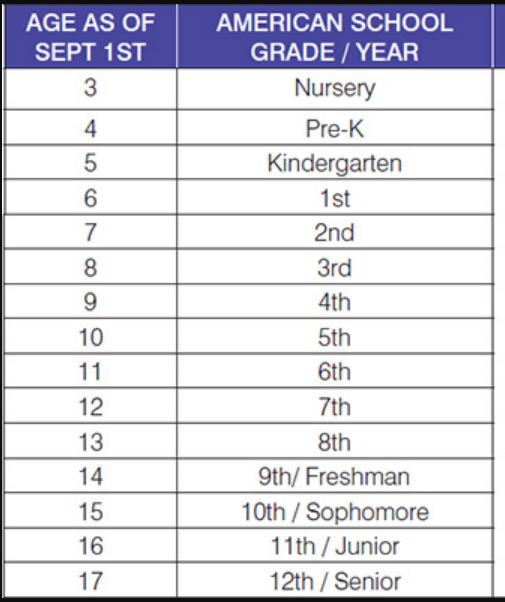

In [97]:
# закодируем шкалу grade 
#  создадим функцию 
def grade_of_school(x):
    grade_ls = []
    for grd in x:
        grd = str(grd).replace('–','-')
        grd = str(grd).split('-')
        for n in grd:
            grade_ls.append(n)
    age_list = []
    age = 0
    for g in grade_ls:
        if g == 'N':
            age = 3
        elif g == 'PK':
            age = 4
        elif g == "K" :
            age = 5
        elif g== '1':
            age = 6
        elif g== '2':
            age = 7
        elif g== '3':
            age = 8
        elif g== '4':
            age = 9
        elif g== '5':
            age = 10
        elif g== '6':
            age = 11
        elif g== '7':
            age = 12
        elif g== '8':
            age = 13
        elif g== '9':
            age = 14
        elif g== '10':
            age = 15
        elif g== '11':
            age = 16
        elif g== '12':
            age = 17
        age_list.append(age)
            
    return age_list
# применим функцию
df['schools_age'] = df['schools_grade'].apply(grade_of_school)
df['schools_age']
# найдем минимальный и максимальный возвраст
df['schools_age_min'] = df['schools_age'].apply(lambda x: int(min(x)) if len(x)>0 else x)
df['schools_age_max'] = df['schools_age'].apply(lambda x: int(max(x)) if len(x)>0 else x)
display(df[['schools_grade', 'schools_age_min','schools_age_max']])


# Добавим в лист для удаления 
list_for_drop.append('schools_age')
list_for_drop.append( 'schools')

,schools_grade,schools_age_min,schools_age_max
0,"[3–5, 6–8, 9–12, PK–2, 6–8, 9–12, PK–5, K–12]",4,17
1,"[9-12, 3-8, PK-8]",4,17
2,"[6-8, K-5, 9-12]",5,17
3,"[5-6, PK-4, 7-8, 9-12]",4,17
4,"[7-8, 9-12, PK-6]",4,17
...,...,...,...
335242,"[PK-6, 7-8, 10-12]",4,17
335243,"[K-5, 6-8, 9-12]",5,17
335244,"[K-6, 7-8, 9-12]",5,17
335245,"[PK-6, 7-8, 9-12]",4,17


#### **3.16.2 Закодируем дистанцию следующим образом, найдем максимальное и минимальное расстояние до школы.**                                

In [98]:
# создадим функцию обработки distance
import re
def numbers_to_list(x):
    
    distance_ls = []
    for text in x:
        dist = re.findall(r'\d*.\d*', text)[0]
        distance_ls.append(float(dist))
    return distance_ls

# применим функцию
df['distance_to_school_mil'] =df['distance_to_school'].apply(numbers_to_list)
df['distance_to_school_max'] = df['distance_to_school_mil'].apply(lambda x: float(max(x)) if len(x)>0 else x)
df['distance_to_school_min'] = df['distance_to_school_mil'].apply(lambda x: float(min(x)) if len(x)>0 else x)
display(df[['distance_to_school','distance_to_school_max','distance_to_school_min']]   )

# Добавим в лист для удаления 
list_for_drop.append( 'distance_to_school')
list_for_drop.append('distance_to_school_mil' )

,distance_to_school,distance_to_school_max,distance_to_school_min
0,"[2.7 mi, 3.6 mi, 5.1 mi, 4.0 mi, 10.5 mi, 12.6...",12.6,2.7
1,"[1.65mi, 1.32mi, 1.01mi]",1.65,1.01
2,"[1.19mi, 2.06mi, 2.63mi]",2.63,1.19
3,"[1.05mi, 0.1mi, 1.05mi, 0.81mi]",1.05,0.1
4,"[5.96mi, 3.25mi, 3.03mi]",5.96,3.03
...,...,...,...
335242,"[0.6 mi, 0.5 mi, 1.6 mi]",1.6,0.5
335243,"[1.5 mi, 4.2 mi, 1.2 mi]",4.2,1.2
335244,"[0.4 mi, 1.3 mi, 2.1 mi]",2.1,0.4
335245,"[3 mi, 5.4 mi, 3.2 mi]",5.4,3.0


#### **3.16.3 Закодируем рейтинг следующим образом, найдем максимальный и минимальный рейтинг школы.**                                                                

In [99]:
# создадим функцию обработки rating
def rating_to_list(x):
    
    
    result_ls = []
    for text in x:
        
        num = re.findall(r'\d*', text)[0]
        if len(num) > 0:
            result_ls.append(int(num))
    return result_ls

# применим функцию
df['rating_ls'] =df['school_rating'].apply(rating_to_list)
df['school_rating_max'] = df['rating_ls'].apply(lambda x: int(max(x)) if len(x)>0 else x)
df['school_rating_min'] = df['rating_ls'].apply(lambda x: int(min(x)) if len(x)>0 else x)
display(df[['school_rating','rating_ls','school_rating_max','school_rating_min']]   )
 

# Добавим в лист для удаления 
list_for_drop.append('school_rating')
list_for_drop.append('rating_ls')
list_for_drop.append('schools_red')
list_for_drop.append('schools_mod')
list_for_drop.append('schools_grade')




,school_rating,rating_ls,school_rating_max,school_rating_min
0,"[4, 4, 7, NR, 4, 7, NR, NR]","[4, 4, 7, 4, 7]",7,4
1,"[4/10, None/10, 4/10]","[4, 4]",4,4
2,"[8/10, 4/10, 8/10]","[8, 4, 8]",8,4
3,"[9/10, 9/10, 10/10, 9/10]","[9, 9, 10, 9]",10,9
4,"[4/10, 5/10, 5/10]","[4, 5, 5]",5,4
...,...,...,...,...
335242,"[10/10, 10/10, 7/10]","[10, 10, 7]",10,7
335243,"[4/10, 4/10, 4/10]","[4, 4, 4]",4,4
335244,"[6/10, 6/10, 7/10]","[6, 6, 7]",7,6
335245,"[7/10, 6/10, 8/10]","[7, 6, 8]",8,6


In [100]:
# приведем значения столбцов в числовой формат
df['distance_to_school_max'] = pd.to_numeric(df['distance_to_school_max'])
df['distance_to_school_min'] = pd.to_numeric(df['distance_to_school_min'])
df['school_rating_max'] = pd.to_numeric(df['school_rating_max'])
df['school_rating_min'] = pd.to_numeric(df['school_rating_min'])
df['schools_age_max'] = pd.to_numeric(df['schools_age_max'])
df['schools_age_min'] = pd.to_numeric(df['schools_age_min'])

#### **3.16.4 Исследуем пропуски**
 schools_age_min, schools_age_max,,distance_to_school_max,distance_to_school_min school_rating_max ,school_rating_min

In [101]:
#df.isnull().sum()/df.shape[0]*100
df.isnull().sum()

index                          0
status                     29308
propertyType               33937
street                         0
baths                          0
homeFacts                      0
fireplace                      0
city                           0
schools                        0
sqft                       38668
zipcode                        0
beds                           0
state                          0
stories                   141867
PrivatePool               296862
MlsId                          0
target                         0
Private_Pool                   0
Heating                        0
Cooling                        0
Parking                        0
lotsize                        0
Price/sqft                     0
Year_built                     0
Remodeled_year                 0
gas_logs                       0
living_room                    0
family_room                    0
wood                           0
fireplace_yes                  0
Central_h/

Проверим не является ли причина отсутвия информации об школе тем что объект земельный участок

In [102]:
df[df['distance_to_school_max'].isnull() ][['schools_age_min','schools', 'city','zipcode', 'pr_type']]

,schools_age_min,schools,city,zipcode,pr_type
5,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Philadelphia,19145,town_home
64,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Boston,2127,cooperative
383,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Richmond,77407,SF
427,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Converse,78109,1_level
487,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Boston,2116,MF
...,...,...,...,...,...
328524,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Estero,34135,cooperative
329147,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Hialeah,33015,SF
332419,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Detroit,48207,cooperative
332561,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Fort Lauderdale,33301,town_home


не является

In [103]:
df[df['school_rating_max'].isnull()][['school_rating_max','schools_age_min','schools', 'city','zipcode']]

,school_rating_max,schools_age_min,schools,city,zipcode
5,NaN,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Philadelphia,19145
64,NaN,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Boston,2127
383,NaN,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Richmond,77407
427,NaN,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Converse,78109
487,NaN,NaN,"[{'rating': [], 'data': {'Distance': [], 'Grad...",Boston,2116
...,...,...,...,...,...
334409,NaN,14.0,"[{'rating': ['NA'], 'data': {'Distance': ['3 m...",Detroit,48202
334424,NaN,4.0,"[{'rating': ['NA'], 'data': {'Distance': ['0.2...",Seattle,98121
334623,NaN,5.0,"[{'rating': ['NA'], 'data': {'Distance': ['0.9...",Saginaw,48638
334746,NaN,4.0,"[{'rating': ['NA'], 'data': {'Distance': ['0.2...",Seattle,98109


Заполним пропуски средними храктеристиками школ с привязкой к почтовому индексу района.

In [104]:
# создадим список неоходимый для дальнейших преобразований
list_schools_properties = ['school_rating_max' ,'school_rating_min','distance_to_school_max', 'distance_to_school_min', 'schools_age_min', 'schools_age_max'  ]
# подсчитаем средние храктеристики школ с привязкой к почтовому индексу района. 
pvt_school_zipcode = df.groupby('zipcode')[['school_rating_max' ,'school_rating_min','distance_to_school_max', 'distance_to_school_min', 'schools_age_min', 'schools_age_max']].mean().reset_index()
# создадим функwb. которая будет возвращать нам среднее значение необходимого праметра по почтовому индексу 
def school_index_property(zipcode, col, x):
    if np.isnan(x):
        x = pvt_school_zipcode[pvt_school_zipcode['zipcode'] == zipcode][col]
    else: x
    return float(x)
# применим функцию

df['school_rating_max'] = df[['zipcode', 'school_rating_max']].apply(lambda x: school_index_property(x.zipcode, 'school_rating_max', x.school_rating_max) if np.isnan(x.school_rating_max) else x.school_rating_max, axis = 1)
df['school_rating_min'] = df[['zipcode', 'school_rating_min']].apply(lambda x: school_index_property(x.zipcode, 'school_rating_min', x.school_rating_min) if np.isnan(x.school_rating_min) else x.school_rating_min, axis = 1)

df['distance_to_school_max'] = df[['zipcode', 'distance_to_school_max']].apply(lambda x: school_index_property(x.zipcode, 'distance_to_school_max', x.distance_to_school_max) if np.isnan(x.distance_to_school_max) else x.distance_to_school_max, axis = 1)
df['distance_to_school_min'] = df[['zipcode', 'distance_to_school_min']].apply(lambda x: school_index_property(x.zipcode, 'distance_to_school_min', x.distance_to_school_min) if np.isnan(x.distance_to_school_min) else x.distance_to_school_min, axis = 1)

df['schools_age_min'] = df[['zipcode', 'schools_age_min']].apply(lambda x: school_index_property(x.zipcode, 'schools_age_min', x.schools_age_min) if np.isnan(x.schools_age_min) else x.schools_age_min, axis = 1)
df['schools_age_max'] = df[['zipcode', 'schools_age_max']].apply(lambda x: school_index_property(x.zipcode, 'schools_age_max', x.schools_age_max) if np.isnan(x.schools_age_max) else x.schools_age_max, axis = 1)




C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(x)


C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(x)
C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(x)
C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(x)
C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(x)
C:\Users\Maksym\AppData\Local\Temp\ipykernel_19908\3393138939.py:10: FutureWarni

In [105]:
df[['school_rating_max' ,'school_rating_min','distance_to_school_max', 'distance_to_school_min', 'schools_age_min', 'schools_age_max', 'zipcode']].dropna()

,school_rating_max,school_rating_min,distance_to_school_max,distance_to_school_min,schools_age_min,schools_age_max,zipcode
0,7.0,4.0,12.60,2.70,4.0,17.0,28387
1,4.0,4.0,1.65,1.01,4.0,17.0,99216
2,8.0,4.0,2.63,1.19,5.0,17.0,90049
3,10.0,9.0,1.05,0.10,4.0,17.0,75205
4,5.0,4.0,5.96,3.03,4.0,17.0,32908
...,...,...,...,...,...,...,...
335242,10.0,7.0,1.60,0.50,4.0,17.0,75002
335243,4.0,4.0,4.20,1.20,5.0,17.0,76501
335244,7.0,6.0,2.10,0.40,5.0,17.0,91790
335245,8.0,6.0,5.40,3.00,4.0,17.0,80007


In [106]:
# приведем значения столбцов в числовой формат
df['distance_to_school_max'] = pd.to_numeric(df['distance_to_school_max'])
df['distance_to_school_min'] = pd.to_numeric(df['distance_to_school_min'])
df['school_rating_max'] = pd.to_numeric(df['school_rating_max'])
df['school_rating_min'] = pd.to_numeric(df['school_rating_min'])
df['schools_age_max'] = pd.to_numeric(df['schools_age_max'])
df['schools_age_min'] = pd.to_numeric(df['schools_age_min'])

### **3.17 Обработаем признак target**

В колонке прописаны на только числа но и обозначения валюты, так же указаны цены за месяц. Недвижимость  с ценой за месяц сохраним в отдельный столбец, в дальнейшем будем считать эти объекты для аренды 

In [107]:
# обработаем колонку с ценной

df['price'] = df['target'].apply(lambda x: (x.replace('$', '')))
df['price'] = df['price'].apply(lambda x: x.replace(',', '') )
df['price'] = df['price'].apply(lambda x: int(x)  if  '/mo' not in x else 0)
# цены указанные за месяц запишем в колонку с ценой за месяц
  
df['price_per_month'] =df['target'].apply(lambda x: str(x)  if '/mo' in str(x) else 0)
df['price_per_month'] = df['price_per_month'].apply(lambda x: (str(x).replace('$', '') if x !=0 else 0))
df['price_per_month'] = df['price_per_month'].apply(lambda x: (str(x).replace('/mo', '') if x !=0 else 0))
df['price_per_month'] = df['price_per_month'].apply(lambda x: float(str(x).replace(',', '') if x !=0 else 0))
df[['price', 'price_per_month']]

,price,price_per_month
0,418000,0.0
1,310000,0.0
2,2895000,0.0
3,2395000,0.0
4,5000,0.0
...,...,...
335242,319000,0.0
335243,129000,0.0
335244,639000,0.0
335245,685000,0.0


In [108]:
df[df['price_per_month'] != 0]

,index,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,...,schools_age_min,schools_age_max,distance_to_school_mil,distance_to_school_max,distance_to_school_min,rating_ls,school_rating_max,school_rating_min,price,price_per_month
442,547,for rent,single-family home,4323 N Central Park Ave,3.5 Baths,"({'factValue': '1913', 'factLabel': 'Year buil...",yes,Chicago,"[{'rating': ['1/10', '4/10', '2/10', 'None/10'...","3,300 sqft",...,4.0,17.0,"[12.15, 0.13, 0.38, 0.56]",12.15,0.13,"[1, 4, 2]",4.0,1.0,0,5500.0
487,609,for rent,multi-family,220 Boylston St #1412,2 Baths,"({'factValue': '1985', 'factLabel': 'Year buil...",yes,Boston,"[{'rating': [], 'data': {'Distance': [], 'Grad...","1,673 sqft",...,NaN,NaN,[],NaN,NaN,[],NaN,NaN,0,10500.0
1699,2075,for rent,single-family home,2830 NE 56th Ct,4 Baths,"({'factValue': '1965', 'factLabel': 'Year buil...",nan,Fort Lauderdale,"[{'rating': ['6/10', '2/10', '4/10'], 'data': ...","2,400 sqft",...,4.0,17.0,"[1.19, 1.9, 2.85]",2.85,1.19,"[6, 2, 4]",6.0,2.0,0,6390.0
2488,3025,for rent,multi-family,411 Kline Aly,2.5 Baths,"({'factValue': '2014', 'factLabel': 'Year buil...",nan,Clarksville,"[{'rating': ['8/10', '9/10', '7/10'], 'data': ...","1,280 sqft",...,4.0,17.0,"[6.1, 6.19, 0.68]",6.19,0.68,"[8, 9, 7]",9.0,7.0,0,1200.0
2994,3645,for rent,multi-family,240 E Illinois St #2011,2 Baths,"({'factValue': '2003', 'factLabel': 'Year buil...",nan,Chicago,"[{'rating': ['4/10', '7/10'], 'data': {'Distan...","1,473 sqft",...,4.0,17.0,"[2.48, 0.72]",2.48,0.72,"[4, 7]",7.0,4.0,0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305401,371258,for rent,townhouse,1227 S 19th St,2.5 Baths,"({'factValue': '2011', 'factLabel': 'Year buil...",nan,Philadelphia,"[{'rating': ['1/10'], 'data': {'Distance': ['0...","2,224 sqft",...,14.0,17.0,[0.96],0.96,0.96,[1],1.0,1.0,0,2900.0
305517,371393,for rent,single-family home,112 SW 67th Ave,2 Baths,"({'factValue': '1954', 'factLabel': 'Year buil...",nan,Pembroke Pines,"[{'rating': ['5/10', '4/10', '7/10'], 'data': ...","1,102 sqft",...,5.0,17.0,"[0.81, 0.29, 0.51]",0.81,0.29,"[5, 4, 7]",7.0,4.0,0,3100.0
305847,371791,for rent,multi-family,9436 Turrentine Dr,1.5 Baths,"({'factValue': '', 'factLabel': 'Year built'},...",nan,El Paso,"[{'rating': ['4/10', '8/10', '6/10'], 'data': ...","1,050 sqft",...,4.0,17.0,"[1.55, 1.01, 1.1]",1.55,1.01,"[4, 8, 6]",8.0,4.0,0,890.0
306384,372459,for rent,townhouse,34 Jonquil Pl,2.5 Baths,"({'factValue': '2014', 'factLabel': 'Year buil...",nan,The Woodlands,"[{'rating': ['5/10', '8/10', '7/10', '8/10'], ...","2,601 sqft",...,4.0,17.0,"[5.03, 4.74, 4.84, 5.09]",5.09,4.74,"[5, 8, 7, 8]",8.0,5.0,0,2500.0


In [109]:
# Добавим в лист для удаления 
list_for_drop.append('target')


### **3.18 Обработаем признак price/sqft**

Переведем цену с кв.фут  в цену за кв.м

In [110]:
# напишем функцию
def price_per_sqm(x):
    price = 0
    x = str(x).lower()
    num = re.findall(r'\d+|\d+.\d+', x)
    if len(num)>0:
        price = float(num[0])
    # преведем цену с кв.фут  в цену за кв.м
    result = round(price/0.092903,1)
    return result

# применим функцию 
df['Price_per_mtr'] = df['Price/sqft'].apply(lambda x:price_per_sqm(x) )
# присмотри результа
df[['Price_per_mtr', 'Price/sqft' ]]


,Price_per_mtr,Price/sqft
0,1550.0,$144
1,1711.5,$159/sqft
2,10387.2,$965/sqft
3,3993.4,$371/sqft
4,0.0,0
...,...,...
335242,1313.2,$122
335243,1022.6,$95
335244,4413.2,$410
335245,1593.1,$148


Признак price/sqft, добавим его в список для дальнейшего удаления. 

In [111]:
list_for_drop.append('Price/sqft')

### **3.19 Удалим признак street**

Так как необходимая информация о городе у нас есть, признак улицы можно удалить

In [112]:

# Добавим в лист для удаления 
list_for_drop.append('street')

### **3.20 Удалим признак index**

In [113]:

# Добавим в лист для удаления 
list_for_drop.append('index')

_________________________________

## **4. Исследование данных**

Цель этого шага — понять слабые и сильные стороны предоставленных данных, определить их достаточность, оценить взаимосвязи между признаками и предложить идеи, как их использовать.

### **4.1 Выводим описательные статистики для числовых и категориальных признаков**

In [114]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
types = df.dtypes
num_features = list(types[(types != 'object')].index[1:])

print('Num_features: ', num_features)
obj_features = list(types[(types == 'object')].index)
print('\n')
print('Obj_features:', obj_features)

Num_features:  ['Private_Pool', 'Year_built', 'Remodeled_year', 'gas_logs', 'living_room', 'family_room', 'wood', 'fireplace_yes', 'Central_h/c', 'Cooling_present', 'Heating_present', 'ESQ', 'lotsize_sqmrt', 'sqmtr', 'bed', 'bath', 'level', 'schools_age_min', 'schools_age_max', 'distance_to_school_max', 'distance_to_school_min', 'school_rating_max', 'school_rating_min', 'price', 'price_per_month', 'Price_per_mtr']


Obj_features: ['status', 'propertyType', 'street', 'baths', 'homeFacts', 'fireplace', 'city', 'schools', 'sqft', 'zipcode', 'beds', 'state', 'stories', 'PrivatePool', 'MlsId', 'target', 'Heating', 'Cooling', 'Parking', 'lotsize', 'Price/sqft', 'Type_of_heating', 'Type_of_cooling', 'Parking_type', 'pr_type', 'city_mod', 'city_top_100', 'schools_red', 'schools_mod', 'school_rating', 'schools_grade', 'distance_to_school', 'schools_age', 'distance_to_school_mil', 'rating_ls']


In [115]:
df.head(3)

,index,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,...,schools_age_max,distance_to_school_mil,distance_to_school_max,distance_to_school_min,rating_ls,school_rating_max,school_rating_min,price,price_per_month,Price_per_mtr
0,0,Active,Single Family Home,240 Heather Ln,3.5,"({'factValue': '2019', 'factLabel': 'Year buil...",gas logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,...,17.0,"[2.7, 3.6, 5.1, 4.0, 10.5, 12.6, 2.7, 3.1]",12.60,2.70,"[4, 4, 7, 4, 7]",7.0,4.0,418000,0.0,1550.0
1,1,for sale,single-family home,12911 E Heroy Ave,3 Baths,"({'factValue': '2019', 'factLabel': 'Year buil...",nan,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",...,17.0,"[1.65, 1.32, 1.01]",1.65,1.01,"[4, 4]",4.0,4.0,310000,0.0,1711.5
2,2,for sale,single-family home,2005 Westridge Rd,2 Baths,"({'factValue': '1961', 'factLabel': 'Year buil...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",...,17.0,"[1.19, 2.06, 2.63]",2.63,1.19,"[8, 4, 8]",8.0,4.0,2895000,0.0,10387.2


In [116]:
#выделяем имена числовых признаков в виде списка для удобства дальнейшей работы
features = [ 'Year_built', 'Remodeled_year', 'lotsize_sqmtr', 'sqmtr', 'level', 'schools_age_min', 'schools_age_max', 'distance_to_school_max', 'distance_to_school_min', 'school_rating_max', 'school_rating_min', 'price']



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335109 entries, 0 to 335246
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   335109 non-null  int64  
 1   status                  305801 non-null  object 
 2   propertyType            301172 non-null  object 
 3   street                  335109 non-null  object 
 4   baths                   335109 non-null  object 
 5   homeFacts               335109 non-null  object 
 6   fireplace               335109 non-null  object 
 7   city                    335109 non-null  object 
 8   schools                 335109 non-null  object 
 9   sqft                    296441 non-null  object 
 10  zipcode                 335109 non-null  object 
 11  beds                    335109 non-null  object 
 12  state                   335109 non-null  object 
 13  stories                 193242 non-null  object 
 14  PrivatePool             3

В данные пресутсвуют пропуски, которые необходимо буде исследовать и обработать

Просмотрим статистические данные

In [118]:
df.describe()

,index,Year_built,Remodeled_year,fireplace_yes,Central_h/c,Cooling_present,Heating_present,ESQ,lotsize_sqmrt,sqmtr,...,level,schools_age_min,schools_age_max,distance_to_school_max,distance_to_school_min,school_rating_max,school_rating_min,price,price_per_month,Price_per_mtr
count,335109.000000,335109.000000,335109.000000,335109.000000,335109.000000,335109.000000,335109.000000,335109.000000,335109.000000,3.351090e+05,...,335109.000000,334499.000000,334499.000000,334499.000000,334499.000000,334412.000000,334412.000000,3.351090e+05,335109.000000,3.351090e+05
mean,188549.495785,1979.298527,1982.846921,0.213444,0.570104,0.116464,0.859186,0.000791,214.111316,5.758101e+02,...,1.066005,3.551684,13.584531,5.127290,1.178943,6.763382,3.656842,6.558818e+05,2.729655,2.366641e+03
std,108891.206464,31.197547,29.217931,0.409739,0.495062,0.320781,0.347830,0.028110,323.506575,1.472874e+05,...,3.346120,2.100019,6.683870,8.156553,5.601410,2.293895,2.034555,1.887698e+06,181.250096,1.016689e+05
min,0.000000,1788.000000,1788.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,94197.000000,1958.000000,1966.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,9.290000e+01,...,0.000000,4.000000,17.000000,1.700000,0.370000,5.000000,2.000000,1.800000e+05,0.000000,8.073000e+02
50%,188557.000000,1987.000000,1987.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.509000e+02,...,1.000000,4.000000,17.000000,2.880000,0.700000,7.000000,3.000000,3.200000e+05,0.000000,1.593100e+03
75%,282829.000000,2005.000000,2006.000000,0.000000,1.000000,0.000000,1.000000,0.000000,464.500000,2.276000e+02,...,2.000000,4.000000,17.000000,5.500000,1.300000,9.000000,5.000000,5.950000e+05,0.000000,2.723300e+03
max,377184.000000,2022.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35005.200000,7.394888e+07,...,1120.000000,14.000000,17.000000,1591.090000,1590.380000,10.000000,10.000000,1.950000e+08,72500.000000,5.381958e+07


- Bath: max значение 750, что вероятно  является вбросом
- Beds: max значение 144, что может являться вбросом, если объект не являеться гостинницей
- Year_build : min 1788 max 2022
- Remodeled year: min 1788 max 2022
- SQ mtr: max 7.394888e+07 - возможно является вбросом
- Level: max 1120 этажей - является вбросом
- Price: min 0 $ max 195 000 000$ - проверим на наличе вбросов

### **4.2 Исследуем значения Baths и beds**  

Проверим аномальные значения в 750 ванн. Подсчитаем количество признаков

In [119]:
df[df['bath'] == 750][['homeFacts', 'pr_type', 'sqmtr', 'bed' , 'bath','sqft']].reset_index()

,index,homeFacts,pr_type,sqmtr,bed,bath,sqft
0,909,"({'factValue': '1993', 'factLabel': 'Year buil...",traditional,163.3,1,750,"1,758"
1,1655,"({'factValue': '2013', 'factLabel': 'Year buil...",0,127.0,0,750,"1,367"
2,2950,"({'factValue': '1981', 'factLabel': 'Year buil...",0,81.1,1,750,873
3,6186,"({'factValue': '1936', 'factLabel': 'Year buil...",0,173.2,1,750,"1,864"
4,6291,"({'factValue': '1984', 'factLabel': 'Year buil...",cooperative,124.1,1,750,"1,336"
...,...,...,...,...,...,...,...
232,306497,"({'factValue': '1991', 'factLabel': 'Year buil...",0,74.4,0,750,801
233,309026,"({'factValue': '1998', 'factLabel': 'Year buil...",cooperative,77.3,1,750,832
234,309337,"({'factValue': '2019', 'factLabel': 'Year buil...",cooperative,195.3,1,750,"2,102"
235,309452,"({'factValue': '1998', 'factLabel': 'Year buil...",cooperative,77.8,1,750,837


Площадь объекта не указана, много упущенной информации об этих 237 объектах, удалим их 

In [120]:
df = df[df['bath'] != 750]
df.shape

(334872, 62)

Просмотрим следующее по аномальность значение

In [121]:
df[df['bath'] == 116][['baths','homeFacts', 'pr_type', 'sqmtr', 'bed', 'price','sqft']].reset_index()

,index,baths,homeFacts,pr_type,sqmtr,bed,price,sqft
0,52257,116 / 116 / 116,"({'factValue': '2019', 'factLabel': 'Year buil...",MF,9290.2,0,1600000,99999


In [122]:
df[df['bed'] == 144][['baths','homeFacts', 'pr_type', 'sqmtr', 'bed', 'price','sqft']].reset_index()

,index,baths,homeFacts,pr_type,sqmtr,bed,price,sqft
0,6000,2,"({'factValue': '', 'factLabel': 'Year built'},...",MF,5794.9,144,1590000,62376


Эти объекты по цене и площаде похожи на общежитие и гостиницу.
Проверим также объекты где количество ванн  больше 15 

In [123]:
df[df['bath'] >15][['bath', 'baths','homeFacts', 'pr_type', 'propertyType','sqmtr', 'bed','beds', 'price','sqft']].reset_index()

,index,bath,baths,homeFacts,pr_type,propertyType,sqmtr,bed,beds,price,sqft
0,2762,18,18,"({'factValue': '1965', 'factLabel': 'Year buil...",MF,Multi-Family Home,1119.7,32,32,3600000,12052
1,4947,19,19 Baths,"({'factValue': '2007', 'factLabel': 'Year buil...",SF,single-family home,287.1,5,5 Beds,369000,"3,090 sqft"
2,5151,16,16 Baths,"({'factValue': '1968', 'factLabel': 'Year buil...",MF,multi-family,1293.7,26,26 Beds,2640000,"13,925 sqft"
3,8480,17,17,"({'factValue': '1989', 'factLabel': 'Year buil...",SF,Single Family,1536.1,11,11,32000000,"16,534"
4,9461,16,16.0,"({'factValue': '1998', 'factLabel': 'Year buil...",SF,Single Family,1040.9,10,10,30000000,"11,204"
...,...,...,...,...,...,...,...,...,...,...,...
188,320796,21,Bathrooms: 21,"({'factValue': '1899', 'factLabel': 'Year buil...",MF,Multi Family,227.4,5,5 bd,1500000,"Total interior livable area: 2,448 sqft"
189,325717,18,Bathrooms: 18,"({'factValue': '2008', 'factLabel': 'Year buil...",cooperative,Condo,1134.4,13,13 bd,3699000,"Total interior livable area: 12,211 sqft"
190,327621,16,16 ba,"({'factValue': '1947', 'factLabel': 'Year buil...",MF,Multi Family,1216.2,16,16 bd,2180000,"13,091 sqft"
191,330112,16,Bathrooms: 16,"({'factValue': '1917', 'factLabel': 'Year buil...",MF,Multi Family,349.3,46,46 bd,1175000,"Total interior livable area: 3,760 sqft"


Есть объекты с большим количеством ванных комнат, но на первый взгляд, имеют небольшие площади. Проверим эти объекты создадим столбец где будет подсчитана минимально необходимая площадь к данному количеству ванных комнат, из расчета минимальная  площадь ванной комнаты возьмём 4 м.кв + 5 м.кв на жилую площадь. Возможно объекты являются хостелами

In [124]:

df['bath_beds_req_sqmtr'] = df['bed']*5 + df['bath']*4

In [125]:
df[df['bath'] >15][['bath', 'baths','homeFacts', 'pr_type', 'propertyType','sqmtr','bath_beds_req_sqmtr', 'bed','beds', 'price','sqft']].reset_index()

,index,bath,baths,homeFacts,pr_type,propertyType,sqmtr,bath_beds_req_sqmtr,bed,beds,price,sqft
0,2762,18,18,"({'factValue': '1965', 'factLabel': 'Year buil...",MF,Multi-Family Home,1119.7,232,32,32,3600000,12052
1,4947,19,19 Baths,"({'factValue': '2007', 'factLabel': 'Year buil...",SF,single-family home,287.1,101,5,5 Beds,369000,"3,090 sqft"
2,5151,16,16 Baths,"({'factValue': '1968', 'factLabel': 'Year buil...",MF,multi-family,1293.7,194,26,26 Beds,2640000,"13,925 sqft"
3,8480,17,17,"({'factValue': '1989', 'factLabel': 'Year buil...",SF,Single Family,1536.1,123,11,11,32000000,"16,534"
4,9461,16,16.0,"({'factValue': '1998', 'factLabel': 'Year buil...",SF,Single Family,1040.9,114,10,10,30000000,"11,204"
...,...,...,...,...,...,...,...,...,...,...,...,...
188,320796,21,Bathrooms: 21,"({'factValue': '1899', 'factLabel': 'Year buil...",MF,Multi Family,227.4,109,5,5 bd,1500000,"Total interior livable area: 2,448 sqft"
189,325717,18,Bathrooms: 18,"({'factValue': '2008', 'factLabel': 'Year buil...",cooperative,Condo,1134.4,137,13,13 bd,3699000,"Total interior livable area: 12,211 sqft"
190,327621,16,16 ba,"({'factValue': '1947', 'factLabel': 'Year buil...",MF,Multi Family,1216.2,144,16,16 bd,2180000,"13,091 sqft"
191,330112,16,Bathrooms: 16,"({'factValue': '1917', 'factLabel': 'Year buil...",MF,Multi Family,349.3,294,46,46 bd,1175000,"Total interior livable area: 3,760 sqft"


Теоретически возможно разместить эти количества спален и кроватей на данной площади. 

In [126]:
# добавим 'bath_beds_req_sqmtr' в лист на удаление
list_for_drop.append('bath_beds_req_sqmtr')

### **4.3 Исследуем значения price**  

Построим коробчатую диаграмму целевого признака цены

Text(0.5, 1.0, 'Диаграмма распределения цены')

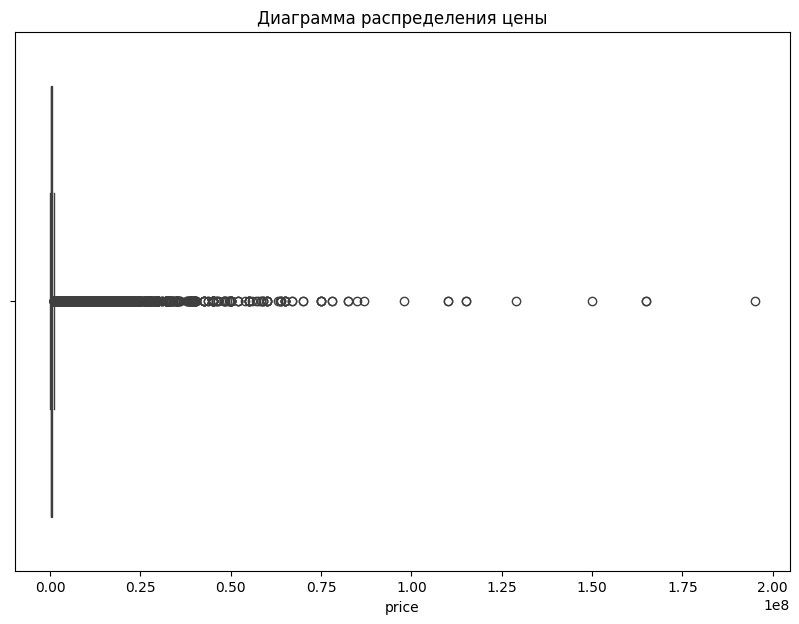

In [127]:
# строим график
fig, ax = plt.subplots(1,1,figsize=(10,7))
boxplot = sns.boxplot(df,x='price')
boxplot.set_title('Диаграмма распределения цены')

На графике видно небольшое количество объектов с очень высокой ценой, иследуем эти объекты

In [128]:
df[df['price'] > 1e8][['propertyType', 'sqmtr', 'price', 'city','stories', 'lotsize_sqmrt']]

,propertyType,sqmtr,price,city,stories,lotsize_sqmrt
44551,single-family home,3530.3,110000000,Beverly Hills,2.0,0.0
90539,single-family home,0.0,150000000,Los Angeles,NaN,0.0
98584,Single Family,1133.5,115000000,Los Angeles,3,0.0
108888,Single Family,0.0,195000000,Los Angeles,2,0.0
118080,single-family home,2662.6,165000000,Beverly Hills,3.0,0.0
147208,Single Family,3994.8,129000000,Beverly Hills,3,0.0
235358,Single Family,2662.6,165000000,Beverly Hills,3,0.0
242167,single-family home,1133.5,115000000,Los Angeles,3.0,0.0
291443,lot/land,68.8,110000000,Beverly Hills,NaN,0.0


Самые дорогие дома находяться в одних из самых дорогих районов Америки, Beverly Hills и Los Angeles. Разделим базу данных на объекты до 1 млн дол. и больше 1 млн. дол.

In [129]:
df_under_1ml = df[df['price'] < 1e6]
df_upper_1ml = df[df['price'] > 1e6]

Просмотрим график снова 

Text(0.5, 1.0, 'Диаграмма распределения цены больше 1 мл.дол')

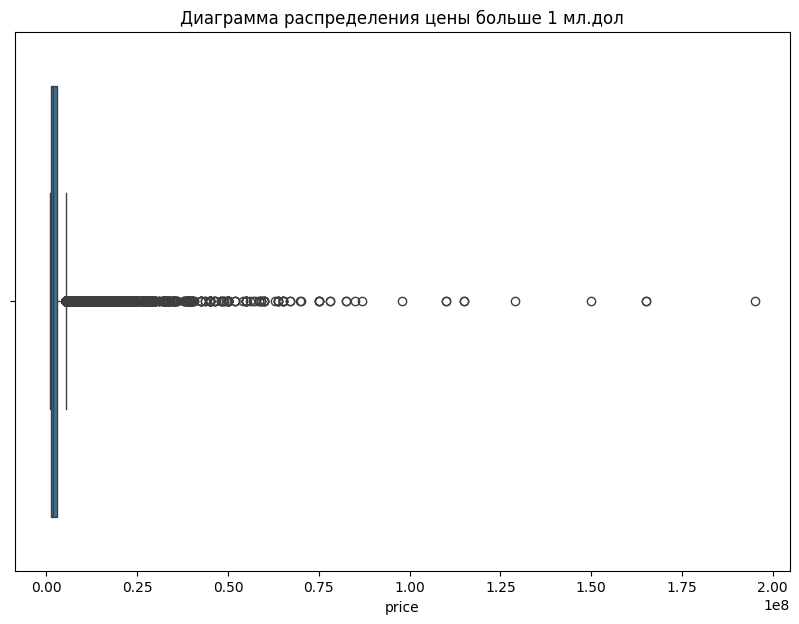

In [130]:
# строим график
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.boxplot(df_upper_1ml,x='price', ax= ax)
ax.set_title('Диаграмма распределения цены больше 1 мл.дол')

Text(0.5, 1.0, 'Диаграмма распределения цены до 1 мл.дол')

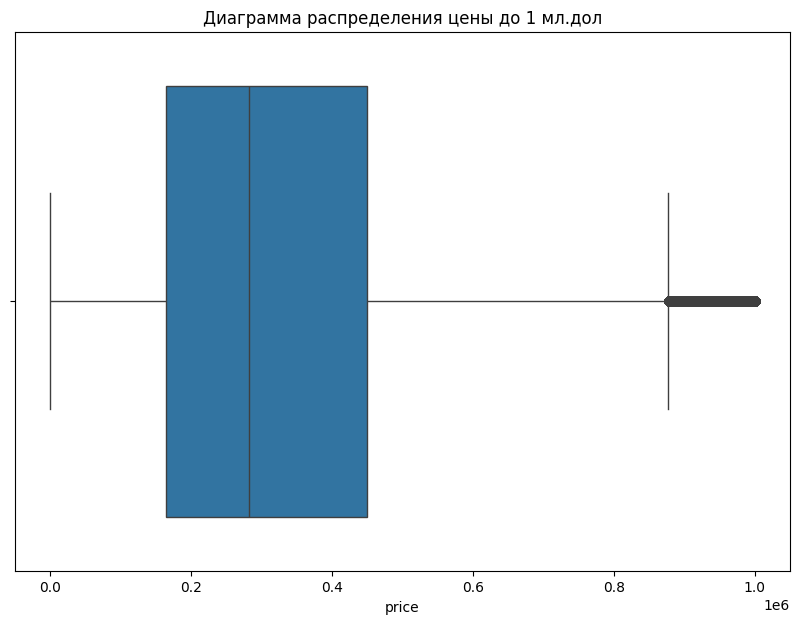

In [131]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
boxplot = sns.boxplot(df_under_1ml,x='price', ax = ax)
ax.set_title('Диаграмма распределения цены до 1 мл.дол')

Диапазон цен сосредоточены в пределах от 180 до 450 тыс. дол. Медиана цены на уровне 280 тыс.дол. небольшое количество объектов имеют цену близкую к 0 и свыше 500 тыс.дол. 

Используем метод Z-отклонений (МЕТОД СИГМ), таким образом избавимся от вбросов.

Давайте реализуем алгоритм метода z-отклонения. Описание алгоритма метода:
-  вычислить математическое ожидание  (среднее) и стандартное отклонение  признака ;
- вычислить нижнюю и верхнюю границу интервала как:
-  найти наблюдения, которые выходят за пределы границ.
-  Напишем функцию outliers_z_score(), которая реализует этот алгоритм.

In [132]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

#Производим очистку базы до 1 мл.дол
outliers, data_cleaned = outliers_z_score(df_under_1ml, 'price', log_scale=True)
#Производим очистку базы больше 1 мл.дол, обозначим ка элитное жильё
outliers, data_elit_cleaned = outliers_z_score(df_upper_1ml, 'price', log_scale=True)

Построим коробчатую диаграму очищенных данных

Количество элитных объектов: 39586
Количество элитных объектов: 288834
Соотношение: 13 %


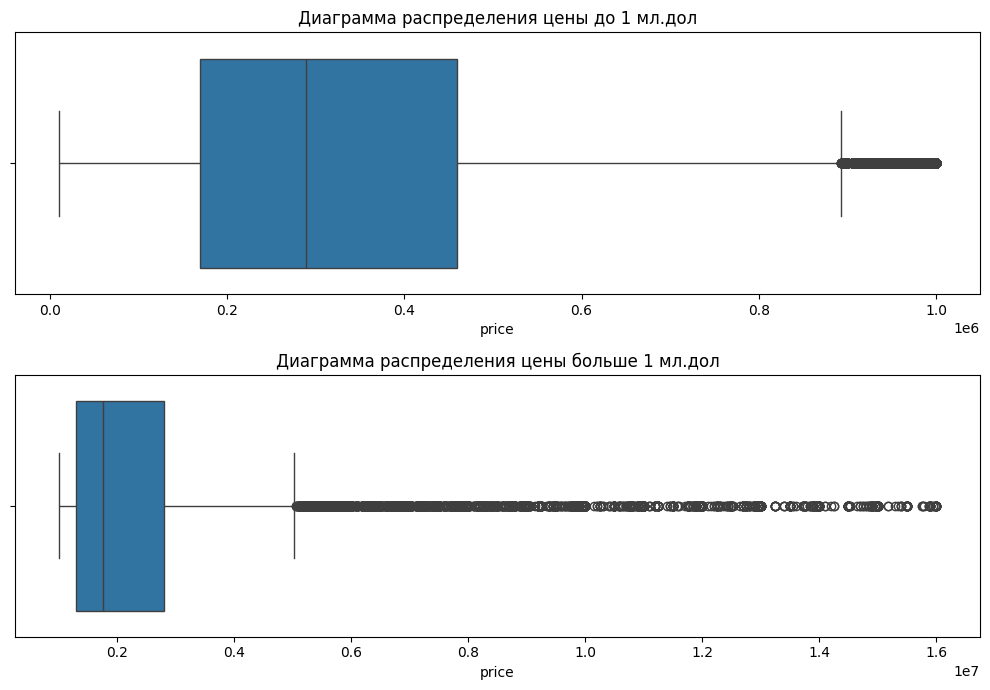

In [133]:
fig, ax = plt.subplots(2,1,figsize=(10,7))
boxplot = sns.boxplot(data_cleaned,x='price', ax = ax[0])
ax[0].set_title('Диаграмма распределения цены до 1 мл.дол')
boxplot = sns.boxplot(data_elit_cleaned,x='price', ax = ax[1])
ax[1].set_title('Диаграмма распределения цены больше 1 мл.дол')
plt.tight_layout()
print('Количество элитных объектов:', data_elit_cleaned.shape[0])
print('Количество элитных объектов:', data_cleaned.shape[0])
print('Соотношение:', int(data_elit_cleaned.shape[0]/data_cleaned.shape[0]*100), '%')

Элитное жилье оценивается не только районом но наличие дорогостоящего ремонта, мебели, так же может иметь значение история объекта. Диапазон цен имеет очень большой разбег, что сильно отразиться на обучении ML.Так же эти объекты составляют всего 14 %. 

В дальнейшем будем использовать недвижимости с ценой до 1 мл.дол

### **4.4 Исследуем значения levels**  


**Справка:** 432 Парк-Авеню 432 Парк-Авеню — это высочайший жилой небоскреб не только в Нью-Йорке, но и во всем мире. Его высота — 426 м. Он располагается в центре Манхэттена и имеет 85 этажей, построенных в форме квадрата. Если считать по уровню крыши, то здание является самым высоким в США

Проверим количество объектов свыше 85 этажей

In [134]:
print(data_cleaned[data_cleaned['level'] > 85].shape)
data_cleaned[data_cleaned['level'] > 85][['propertyType', 'level', 'stories']]

(2, 63)


,propertyType,level,stories
325039,Condo,1120,1120.0
331250,Townhouse,1002,1002.0


Удалим эти объекты

In [135]:
data_cleaned = data_cleaned[data_cleaned['level'] < 85]

Построим коробчатую диаграмму

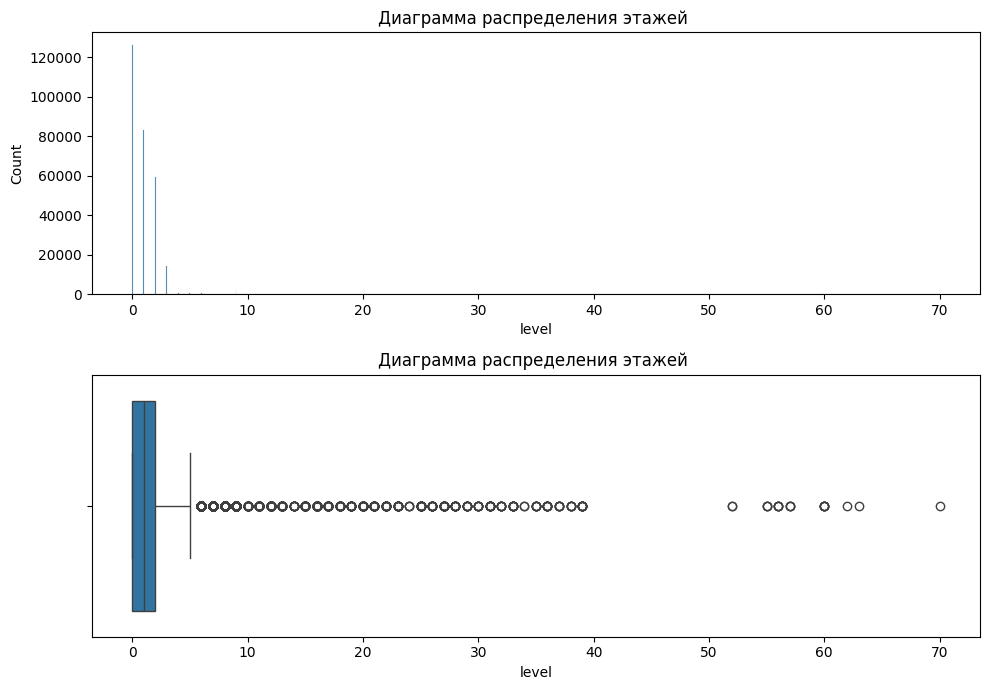

In [136]:
# строим график
fig, ax = plt.subplots(2,1,figsize=(10,7))
sns.histplot(data_cleaned,x='level', ax= ax[0])
ax[0].set_title('Диаграмма распределения этажей ')
sns.boxplot(data_cleaned,x='level', ax= ax[1])
ax[1].set_title('Диаграмма распределения этажей ')
plt.tight_layout()

Используем метод межквартильного размаха,методом Тьюки очистки от вбросов

 outlets: 3845
cleaned: 284379


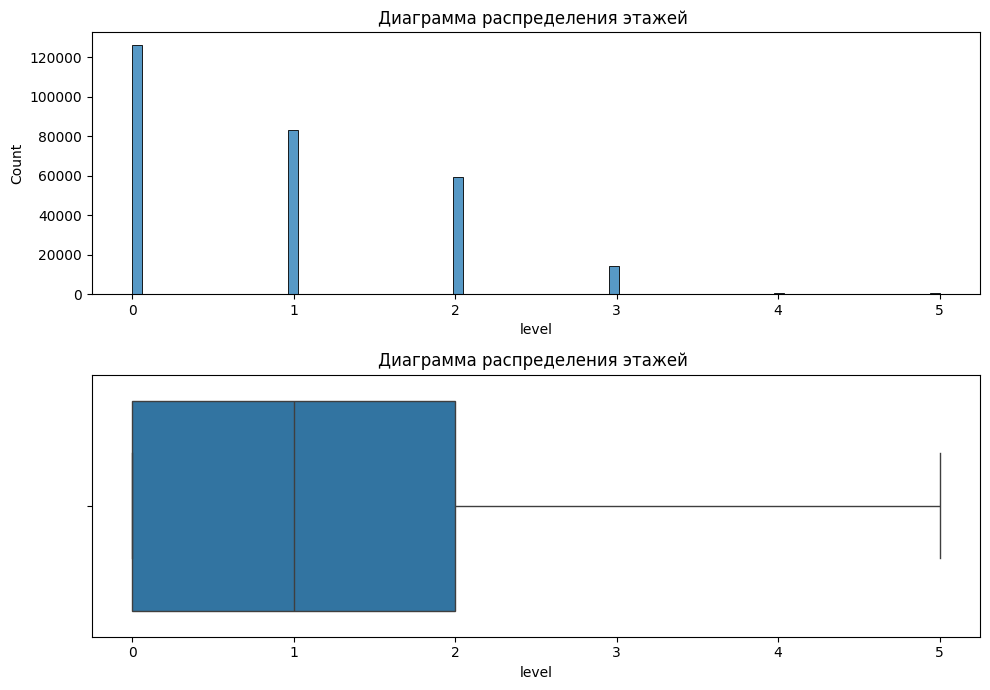

In [137]:
def outliers_iqr_mod(data, feature, left =2, right = 2):
    x = data[feature]
    quartile_25,quartile_75 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_75 - quartile_25
    lower_bound = quartile_25  - left*iqr
    upper_bound = quartile_75 + right*iqr
    outlet = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound)&(x<upper_bound)]
    return outlet ,    cleaned
outlet, data_cleaned = outliers_iqr_mod(data_cleaned, 'level')
print(f' outlets: {outlet.shape[0]}')
print(f'cleaned: {data_cleaned.shape[0]}')
# строим график
fig, ax = plt.subplots(2,1,figsize=(10,7))
sns.histplot(data_cleaned,x='level', ax= ax[0])
ax[0].set_title('Диаграмма распределения этажей ')
sns.boxplot(data_cleaned,x='level', ax= ax[1])
ax[1].set_title('Диаграмма распределения этажей ')
plt.tight_layout()

После очистки стало меньше вбросов диапопазон этажей от 0 до 5.

В базе данный преобладают частные дома

### **4.5 Исследуем значения sqmtr**  

Построим коробчатую диаграмму и гистограму. 

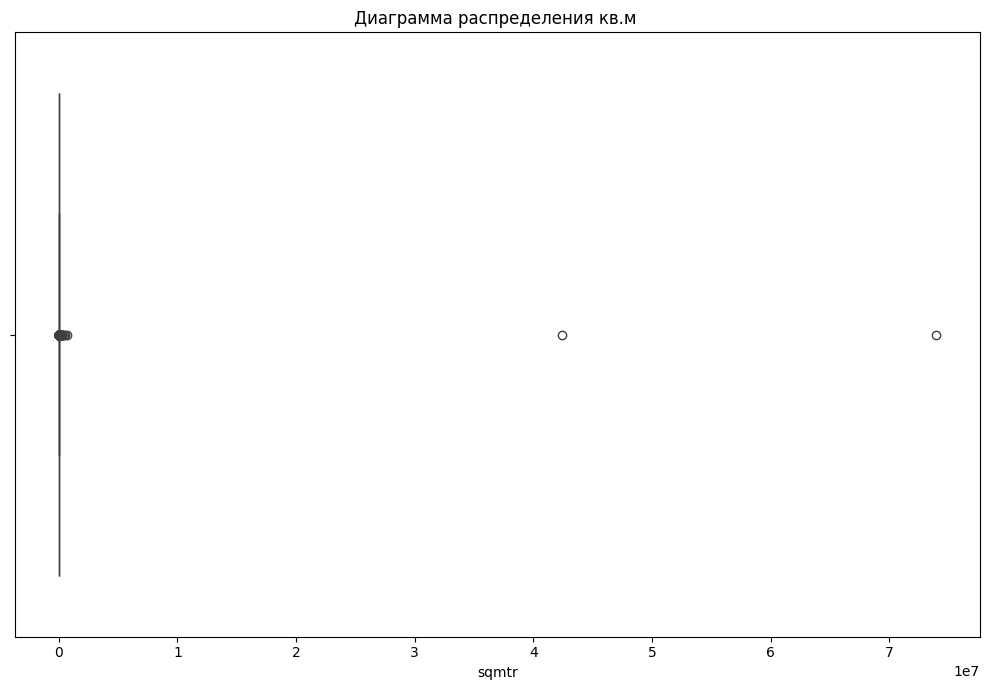

In [138]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.boxplot(data_cleaned,x='sqmtr', ax= ax)
ax.set_title('Диаграмма распределения кв.м ')
plt.tight_layout()

**Справка:** В источнике упоминаются следующие дома в США с большой площадью:

Pensmore в штате Миссури. Площадь особняка — 6 709 м².

Versailles в штате Флорида. Общая площадь дома — 8 361 м².

Удалим эти объекты

In [139]:
data_cleaned = data_cleaned[data_cleaned['sqmtr'] < 8400]

In [140]:
data_cleaned[data_cleaned['sqmtr'] > 1e3].shape

(602, 63)

In [141]:
# просмотрим объекты без указанной площади но с указанной ценой за кв.м
(data_cleaned[(data_cleaned['sqmtr'] == 0) & (data_cleaned['Price_per_mtr'] != 0) ][['lotsize_sqmrt', 'sqmtr','Price_per_mtr', 'price']])

,lotsize_sqmrt,sqmtr,Price_per_mtr,price
7,812.9,0.0,613.5,68000
301,613.2,0.0,495.1,54995
369,760.9,0.0,871.9,129900
965,0.0,0.0,258.3,28500
2025,0.0,0.0,1119.4,289900
...,...,...,...,...
334850,0.0,0.0,1388.5,226500
334988,0.0,0.0,2734.0,539000
335060,674.6,0.0,2744.8,749500
335104,0.0,0.0,2874.0,349990


Вычислим площадь объектов без указанной площади но с указаной ценой за кв.м и общей ценой, результат заполним во временны столбец calc_sqmtr

In [142]:

data_cleaned.loc[:,['calc_sqmtr']] = data_cleaned[[ 'Price_per_mtr', 'price']].apply(lambda x: round(x.price/x.Price_per_mtr,1) if x.Price_per_mtr != 0 else 0, axis =1)
data_cleaned['calc_sqmtr']

0         269.7
1         181.1
5          83.3
6         140.5
7         110.8
          ...  
335242    242.9
335243    126.1
335244    144.8
335245    430.0
335246    177.2
Name: calc_sqmtr, Length: 284053, dtype: float64

In [143]:
# Просмотрим не заполненные значения
data_cleaned[(data_cleaned['calc_sqmtr'] == 0)][['sqmtr' ,'calc_sqmtr', 'Price_per_mtr', 'price']]

,sqmtr,calc_sqmtr,Price_per_mtr,price
23,0.0,0.0,0.0,799000
24,239.2,0.0,0.0,499900
34,0.0,0.0,0.0,54000
36,0.0,0.0,0.0,850000
40,0.0,0.0,0.0,125000
...,...,...,...,...
334828,0.0,0.0,0.0,309000
334863,0.0,0.0,0.0,25000
335079,271.9,0.0,0.0,366170
335080,0.0,0.0,0.0,160000


Этих объектов слишком много, заполним пустые значения средними значениями. Площадь кв.метр следующим образом, вычислим среднюю цену за кв.м по индексу района города, далее получим площадь разделив цену объекта на цену за кв.м

In [144]:
# рассчитаем среднюю цену за кв.м  по почтовым индексам районов
pivot_price_per_mtr_index = data_cleaned[data_cleaned['Price_per_mtr'] !=0].groupby('zipcode')['Price_per_mtr'].median()
pivot_price_per_mtr_index = pivot_price_per_mtr_index.round(1)


In [145]:
# напишем функцию которая буде возвращать нам значение из pivot_mean_year_state
def price_mean(price, zipcode):
    if price == 0 and zipcode in pivot_price_per_mtr_index.index:
        result = int(pivot_price_per_mtr_index[zipcode])
    else: result = price
    return result
    
    
# применим функцию  
data_cleaned['Price_per_mtr'] = data_cleaned[['zipcode','Price_per_mtr']].apply(lambda x: price_mean(zipcode = x.zipcode, price = x.Price_per_mtr), axis = 1)
data_cleaned['Price_per_mtr']

0         1550.0
1         1711.5
5         2508.0
6         1291.7
7          613.5
           ...  
335242    1313.2
335243    1022.6
335244    4413.2
335245    1593.1
335246    1625.4
Name: Price_per_mtr, Length: 284053, dtype: float64

Рассчитаем плошадь объекта по вычисленной среднеей цене за кв.м

In [146]:
# Рассчитаем площадь объекта
data_cleaned['calc_sqmtr'] = data_cleaned[[ 'Price_per_mtr', 'price']].apply(lambda x: x.price/x.Price_per_mtr if x.Price_per_mtr != 0 else 0, axis =1)
# Перезапишем значения из столбца calc_sqmtr в пустые строки столбца sqmtr
data_cleaned['sqmtr'] = data_cleaned[['sqmtr', 'calc_sqmtr']].apply(lambda x: x.calc_sqmtr if x.sqmtr == 0 else x.sqmtr, axis = 1 )
# просмотрим оставшиеся пустые строки	
data_cleaned[(data_cleaned['sqmtr'] == 0)][['sqmtr','calc_sqmtr', 'Price_per_mtr', 'price', 'zipcode', ]]

,sqmtr,calc_sqmtr,Price_per_mtr,price,zipcode
36,0.0,0.0,0.0,850000,10006
2674,0.0,0.0,0.0,100000,34601
3853,0.0,0.0,0.0,39900,37380
5283,0.0,0.0,0.0,65000,79942
8633,0.0,0.0,0.0,134900,37055
...,...,...,...,...,...
305548,0.0,0.0,0.0,765000,28655
306660,0.0,0.0,0.0,50000,75792
308619,0.0,0.0,0.0,75000,84013
310184,0.0,0.0,0.0,304000,94581


Удалось сущесвенно уменьшить количество пустых строк, удалим их из базы

In [147]:
data_cleaned = data_cleaned[(data_cleaned['sqmtr'] != 0)]
data_cleaned.shape

(283843, 64)

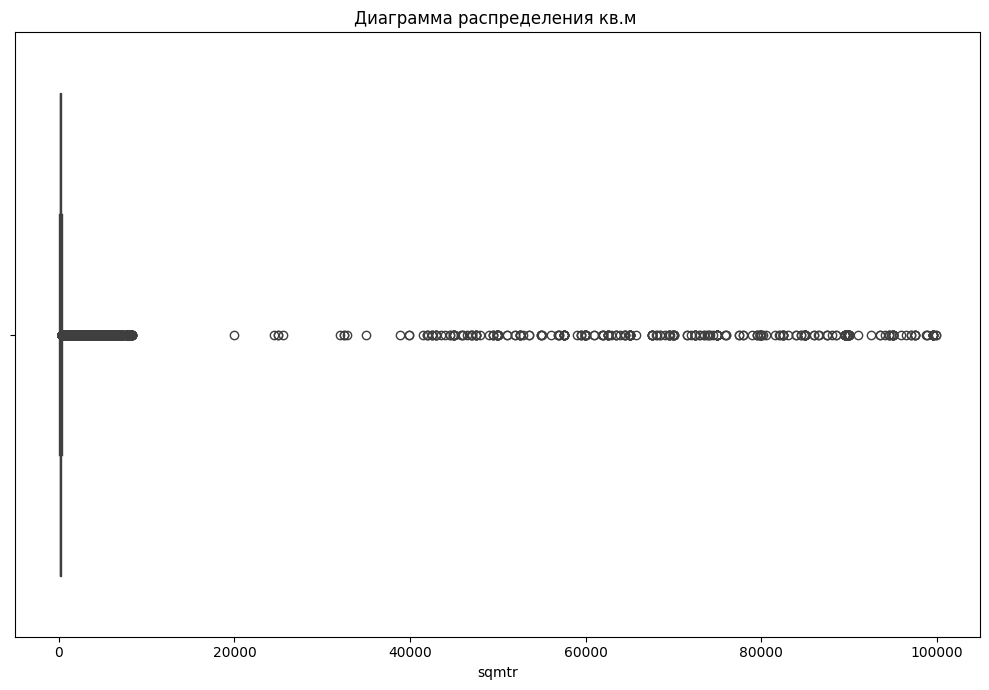

In [148]:
# Построим коробчатую диаграмму
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.boxplot(data_cleaned,x='sqmtr', ax= ax)
ax.set_title('Диаграмма распределения кв.м ')
plt.tight_layout()

Подсчитаем количество объектов от 1000 м.кв до 8 400 м.кв

In [149]:
print('количество объектов от 1000 м.кв до 8 400 м.кв:' , data_cleaned[data_cleaned['sqmtr'] > 1e3].shape)

количество объектов от 1000 м.кв до 8 400 м.кв: (989, 64)


Просмотрим эти объекты в каких городах они находятся

In [150]:
data_cleaned[data_cleaned['sqmtr'] > 1e3]['city'].value_counts()

city
New York          266
San Antonio       125
Brooklyn          113
Houston            34
Panama City        25
                 ... 
Middle Village      1
Sherman             1
Buffalo             1
Jamestown           1
Dallas              1
Name: count, Length: 145, dtype: int64

Используем метод межквартильного размаха,методом Тьюки очистки от вбросов

 outlets: 5675
cleaned: 278167


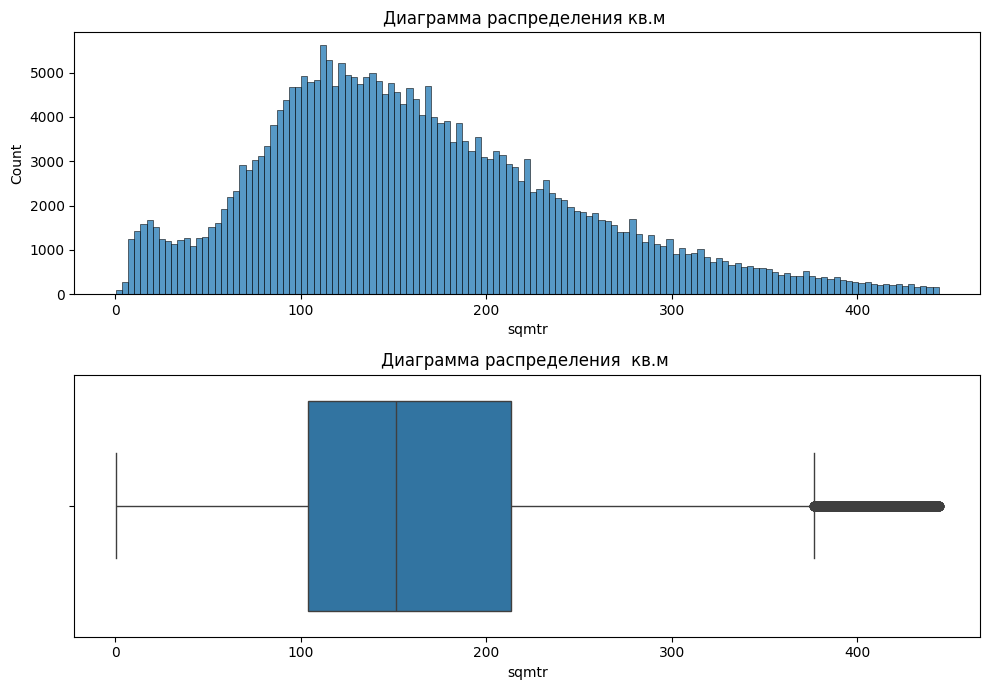

In [151]:
def outliers_iqr_mod(data, feature, left =2, right = 2):
    x = data[feature]
    quartile_25,quartile_75 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_75 - quartile_25
    lower_bound = quartile_25  - left*iqr
    upper_bound = quartile_75 + right*iqr
    outlet = data[(x<lower_bound) | (x>upper_bound)]
    cleaned = data[(x>lower_bound)&(x<upper_bound)]
    return outlet ,    cleaned
outlet, data_cleaned = outliers_iqr_mod(data_cleaned, 'sqmtr')
print(f' outlets: {outlet.shape[0]}')
print(f'cleaned: {data_cleaned.shape[0]}')
# строим график
fig, ax = plt.subplots(2,1,figsize=(10,7))
sns.histplot(data_cleaned,x='sqmtr', ax= ax[0])
ax[0].set_title('Диаграмма распределения кв.м ')
sns.boxplot(data_cleaned,x='sqmtr', ax= ax[1])
ax[1].set_title('Диаграмма распределения  кв.м ')
plt.tight_layout()


После очистки от вбросов удалось получить нормально распределенные данные

### **4.6 Удаление пропусков и не информативных признаков**
Удалим признаки которые нам уже не понадобятся, ранее они былы добавлены в список.

Удалим так же не информативный признак MlsId, добавим его в список

In [152]:
# добавим MlsId в список на удаление
list_for_drop.append('MlsId')

In [153]:
# создами  копию данных 
temp_df = data_cleaned.copy()
# и удалим столбци и согласно списка list_of_drop
for col in list_for_drop:
    if col in list(data_cleaned.columns):
        data_cleaned.drop(col, axis = 1, inplace=True)


In [154]:
#df =temp_df.copy()


Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных  в % (суммарно по всем столбцам таблицы)?

In [155]:
data_cleaned.isnull().sum()/data_cleaned.shape[0]*100

state                     0.000000
Private_Pool              0.000000
Year_built                0.000000
Remodeled_year            0.000000
gas_logs                  0.000000
living_room               0.000000
family_room               0.000000
wood                      0.000000
fireplace_yes             0.000000
Central_h/c               0.000000
Cooling_present           0.000000
Heating_present           0.000000
Type_of_heating           0.000000
ESQ                       0.000000
Type_of_cooling           0.000000
Parking_type              0.000000
lotsize_sqmrt             0.000000
sqmtr                     0.000000
bed                       0.000000
bath                      0.000000
pr_type                   0.000000
city_mod                  0.000000
city_top_100              0.000000
level                     0.000000
schools_age_min           0.121510
schools_age_max           0.121510
distance_to_school_max    0.121510
distance_to_school_min    0.121510
school_rating_max   

В базе остались пропуски в информации об школах, но их количесвто всего 0,18 %, их можно удалить.

In [156]:
data_cleaned=data_cleaned.dropna()

In [157]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 277745 entries, 0 to 335246
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   state                   277745 non-null  object 
 1   Private_Pool            277745 non-null  bool   
 2   Year_built              277745 non-null  int64  
 3   Remodeled_year          277745 non-null  int64  
 4   gas_logs                277745 non-null  bool   
 5   living_room             277745 non-null  bool   
 6   family_room             277745 non-null  bool   
 7   wood                    277745 non-null  bool   
 8   fireplace_yes           277745 non-null  int64  
 9   Central_h/c             277745 non-null  int64  
 10  Cooling_present         277745 non-null  int64  
 11  Heating_present         277745 non-null  int64  
 12  Type_of_heating         277745 non-null  object 
 13  ESQ                     277745 non-null  int64  
 14  Type_of_cooling         2

### **4.7 Подсчитаем количество объектов для аренды и количество земельных участков**

In [158]:
print('В базе данный:',data_cleaned[data_cleaned['price_per_month'] !=0].shape[0], 'объектов под аренду')

В базе данный: 0 объектов под аренду


In [159]:
print('В базе данный:',data_cleaned[data_cleaned['lotsize_sqmrt'] !=0].shape[0], 'земельных участков')

В базе данный: 119247 земельных участков


In [160]:
df[df['lotsize_sqmrt'] !=0].head(5)

,index,status,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,...,distance_to_school_mil,distance_to_school_max,distance_to_school_min,rating_ls,school_rating_max,school_rating_min,price,price_per_month,Price_per_mtr,bath_beds_req_sqmtr
1,1,for sale,single-family home,12911 E Heroy Ave,3 Baths,"({'factValue': '2019', 'factLabel': 'Year buil...",nan,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",...,"[1.65, 1.32, 1.01]",1.650000,1.010000,"[4, 4]",4.00000,4.0000,310000,0.0,1711.5,27
2,2,for sale,single-family home,2005 Westridge Rd,2 Baths,"({'factValue': '1961', 'factLabel': 'Year buil...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",...,"[1.19, 2.06, 2.63]",2.630000,1.190000,"[8, 4, 8]",8.00000,4.0000,2895000,0.0,10387.2,23
3,3,for sale,single-family home,4311 Livingston Ave,8 Baths,"({'factValue': '2006', 'factLabel': 'Year buil...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",...,"[1.05, 0.1, 1.05, 0.81]",1.050000,0.100000,"[9, 9, 10, 9]",10.00000,9.0000,2395000,0.0,3993.4,57
5,5,for sale,townhouse,1624 S Newkirk St,0,"({'factValue': '1920', 'factLabel': 'Year buil...",nan,Philadelphia,"[{'rating': [], 'data': {'Distance': [], 'Grad...",897 sqft,...,[],0.626125,0.252312,[],1.79375,1.0125,209000,0.0,2508.0,10
6,6,Active,Florida,552 Casanova Ct,0,"({'factValue': '2006', 'factLabel': 'Year buil...",nan,POINCIANA,"[{'rating': ['3', '3', '1', 'NR'], 'data': {'D...","1,507",...,"[0.8, 8.3, 4.2, 2.0]",8.300000,0.800000,"[3, 3, 1]",3.00000,1.0000,181500,0.0,1291.7,0


In [161]:
# разделим нашу базу данных на две группы: объекты на продажу, объекты под аренду 
df_rent = data_cleaned[data_cleaned['price_per_month'] !=0]
df_sale = data_cleaned[(data_cleaned['price_per_month'] ==0) ]

df_sale.drop(['price_per_month'], axis =1,inplace =True)


### **4.8 Проведем небольшое исследование зависимости целевого признака price от числовых признаков.**

Выводим описательные статистики для числовых и категориальных признаков

**Гистограмма распределения  и зависимости от цены, года постройки здания**

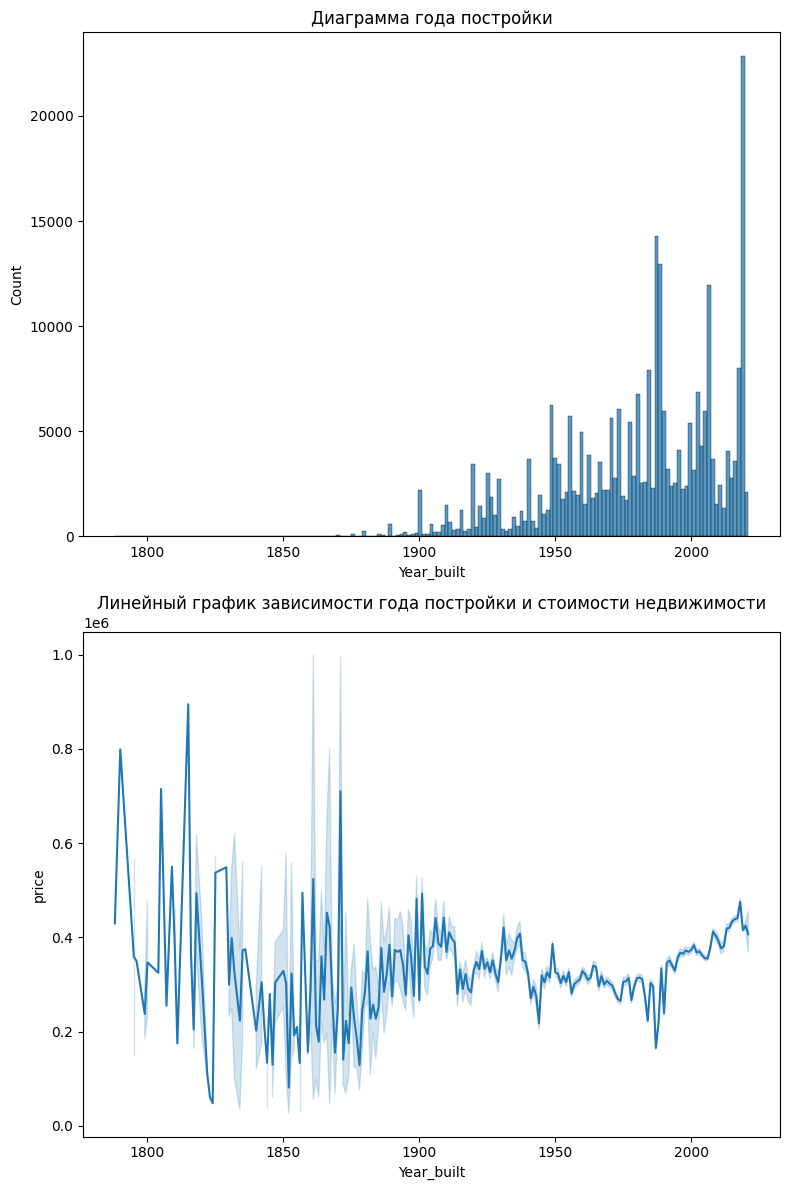

In [162]:
fig, axes = plt.subplots(2, 1, figsize=(8, 12)) # фигура + n х 2 координатных плоскостей
histplot_yearbuild = sns.histplot(data=df_sale, x='Year_built', ax=axes[0])
axes[0].set_title('Диаграмма года постройки')

regplot_yearbuild = sns.lineplot(data=df_sale, x='Year_built', y='price', ax=axes[1])
axes[1].set_title('Линейный график зависимости года постройки и стоимости недвижимости')
plt.tight_layout()


Из графиков видно что, количество строительства увеличивается с 1950 г., пик в 2022 году, видимо связано с продажей новостроек. 

Цены имеют сильный разброс на раритетном жилье до 1900 года, видимо вызван и с исторической значимостью объектов. Спад цены замечен в годах  постройки 1940-1950, 1990 г. дале цена начинает расти до 2022 г., т.е жильё старше 30  лет цениться ниже чем современная недвижимость. 

**Гистограмма распределения  и зависимости от цены, площадью участка**

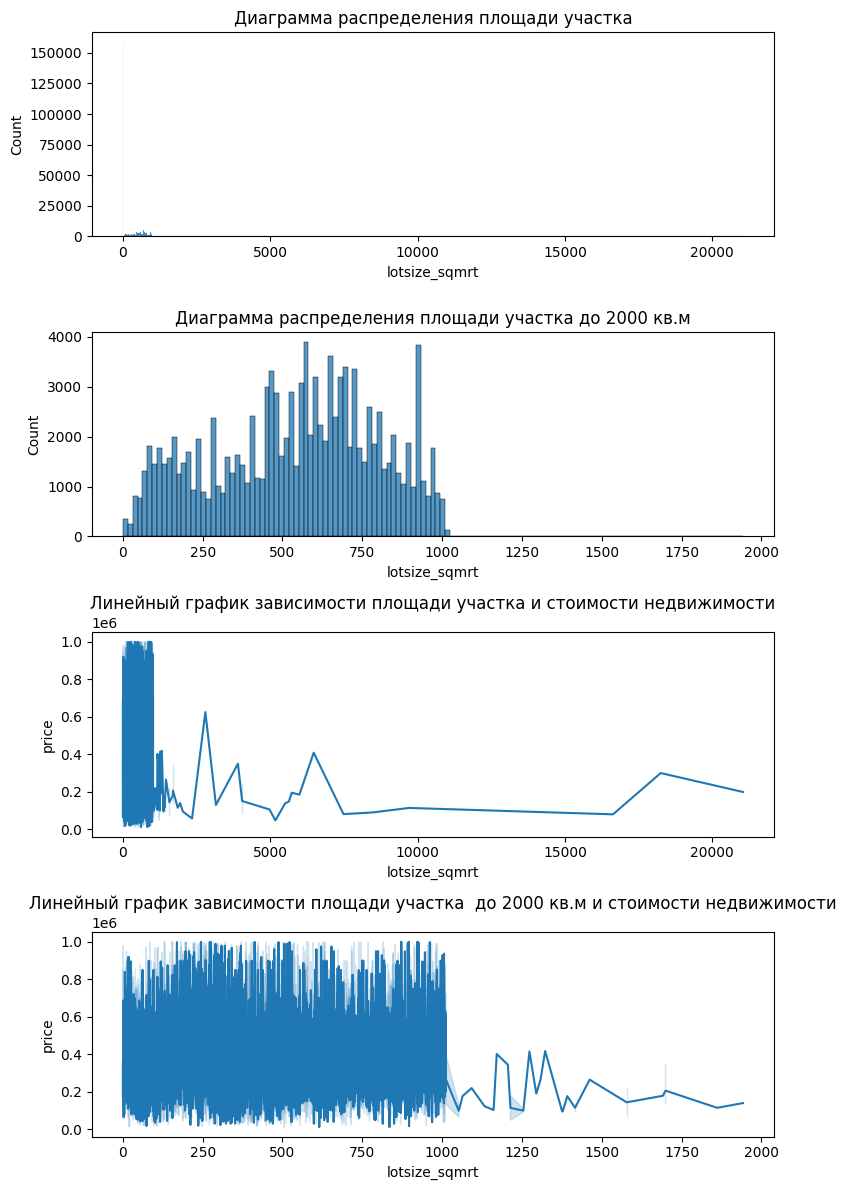

In [163]:
fig, axes = plt.subplots(4, 1, figsize=(8, 12)) # фигура + n х 2 координатных плоскостей

histplot_yearbuild = sns.histplot(data=df_sale, x='lotsize_sqmrt', ax=axes[0])
axes[0].set_title('Диаграмма распределения площади участка')
histplot_yearbuild = sns.histplot(data=df_sale[(df_sale['lotsize_sqmrt'] !=0) & (df_sale['lotsize_sqmrt'] <2000)], x='lotsize_sqmrt', ax=axes[1])
axes[1].set_title('Диаграмма распределения площади участка до 2000 кв.м')

regplot_yearbuild = sns.lineplot(data=df_sale[df_sale['lotsize_sqmrt'] !=0], x='lotsize_sqmrt', y='price', ax=axes[2])
axes[2].set_title('Линейный график зависимости площади участка и стоимости недвижимости')

regplot_yearbuild = sns.lineplot(data=df_sale[(df_sale['lotsize_sqmrt'] !=0) & (df_sale['lotsize_sqmrt'] <2000)], x='lotsize_sqmrt', y='price', ax=axes[3])
axes[3].set_title('Линейный график зависимости площади участка  до 2000 кв.м и стоимости недвижимости')
plt.tight_layout()

*Данные для диаграммы были отфильтрованы, для лучшей визуализации. Пик земельных участков находится в районе 4 - 8 соток земли. Также распространены участки на 2 сотки и меньше на 2-3 сотки. Самые высокие цены как раз и приходятся на эти участки.*

**Зависимость распределения  и зависимости от цены, типа недвижимости постройки здания**

Text(0.5, 1.0, 'Тепловая карта зависимости медиальной цены от 500 тыс.$ до 1 мил.$ от года постройки и типа дома  ')

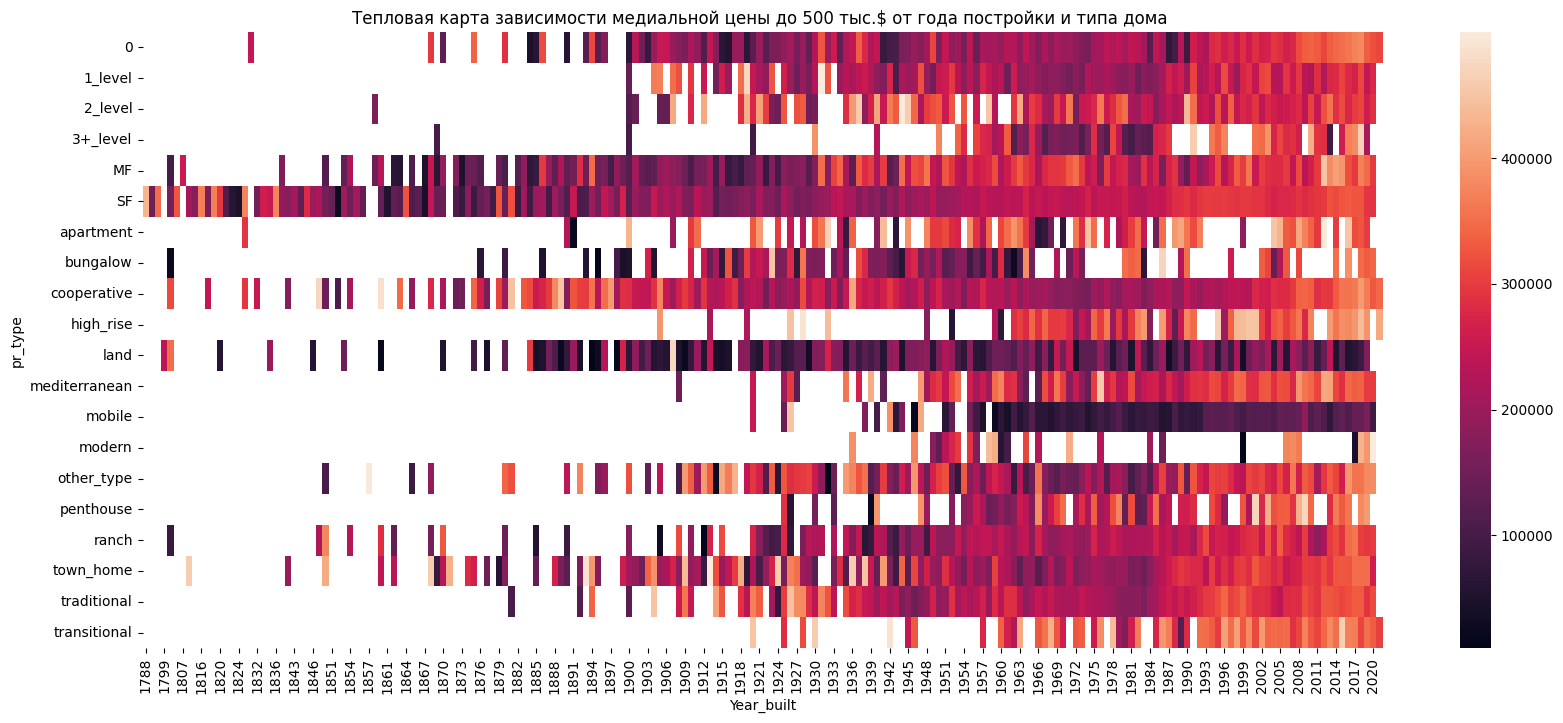

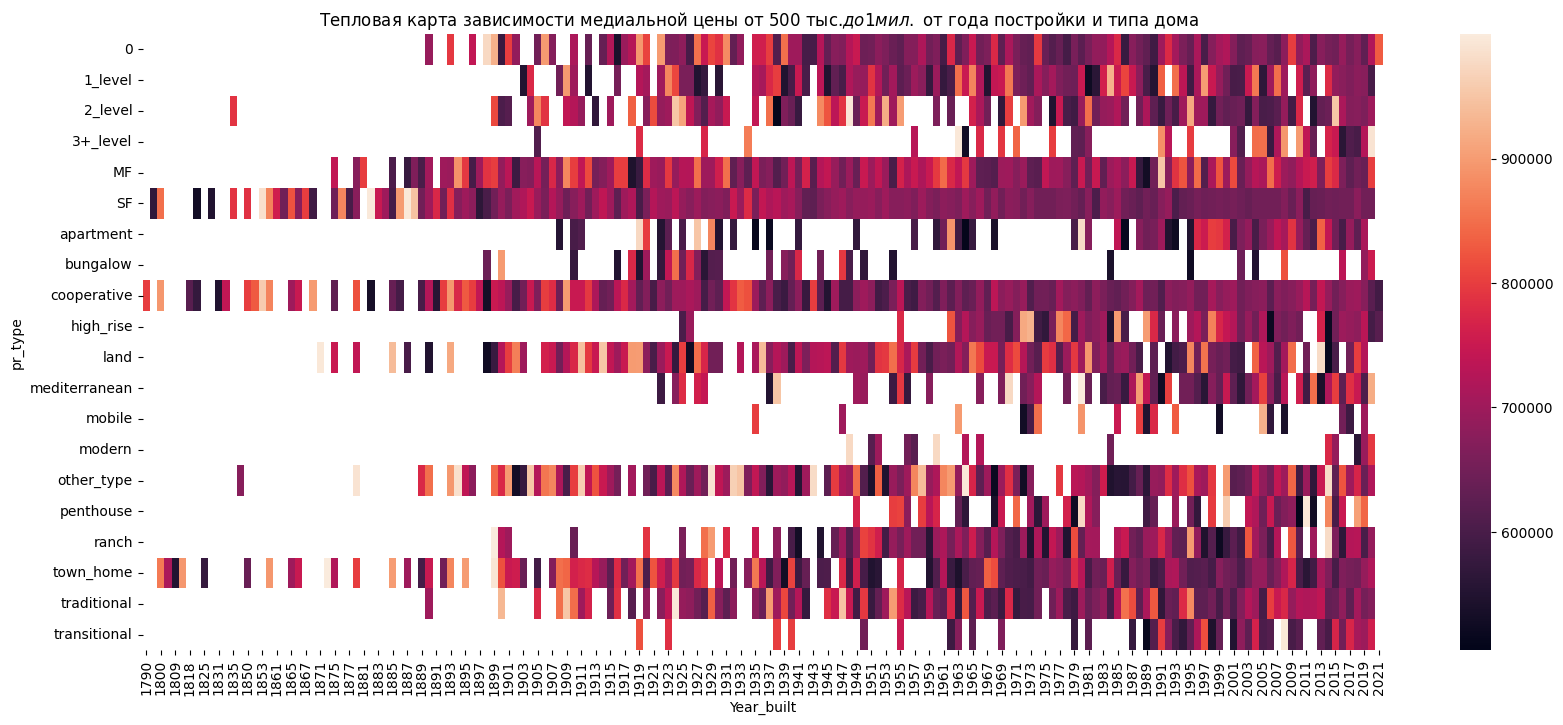

In [164]:
pivot_price_year_05_mil = df_sale[df_sale['price'] <500000].pivot_table(values='price' , index = 'pr_type' , columns =  'Year_built' , aggfunc='median' )
fig_7, axes_7 = plt.subplots(1,1, figsize = (20,8))
heat_map = sns.heatmap(data=pivot_price_year_05_mil, ax=axes_7)
axes_7.set_title('Тепловая карта зависимости медиальной цены до 500 тыс.$ от года постройки и типа дома ')

pivot_price_year_up_05_mil = df_sale[(df_sale['price'] > 500000) & (df_sale['price'] < 1500000)].pivot_table(values='price' , index = 'pr_type' , columns =  'Year_built' , aggfunc='median' )
fig_8, axes_8 = plt.subplots(1,1, figsize = (20,8))
heat_map = sns.heatmap(data=pivot_price_year_up_05_mil, ax=axes_8)
axes_8.set_title('Тепловая карта зависимости медиальной цены от 500 тыс.$ до 1 мил.$ от года постройки и типа дома  ')



*По этим графикам видно, что самым распространённым видом жилья являются дома для одной семьи в основ ном одноэтажные к ним же относятся town house.* 

*Первые дома для нескольких семей одновременно начали строить в 1875 году, пик цен за постройки 1960 г. 1990-2000, после 2000 цена снижается.* 

*Количество апартаментов начинает увеличиваться  в 1990 годах также квартиры конца 1990 начало 2000 оцениваются выше чем современные.*

*Современный стиль жилья в одиночных случаях отмечается в 1950 годах, в остальном после 2010 года.*

*Мобильные дома так же ка и бунгало являются редкими объектами на продажу.* 

*Продажа квартир высотных домов начинается в постройках за 1960 годы, и пик цены наблюдается за  1970 г.  возможно эти дома построены в удобных для жилья райнах с хорошей инфраструктурой.*




**Диаграмма зависимости типа недвижимости и стоимости недвижимости**

Text(0.5, 1.0, 'График зависимости типа недвижимости и стоимости недвижимости')

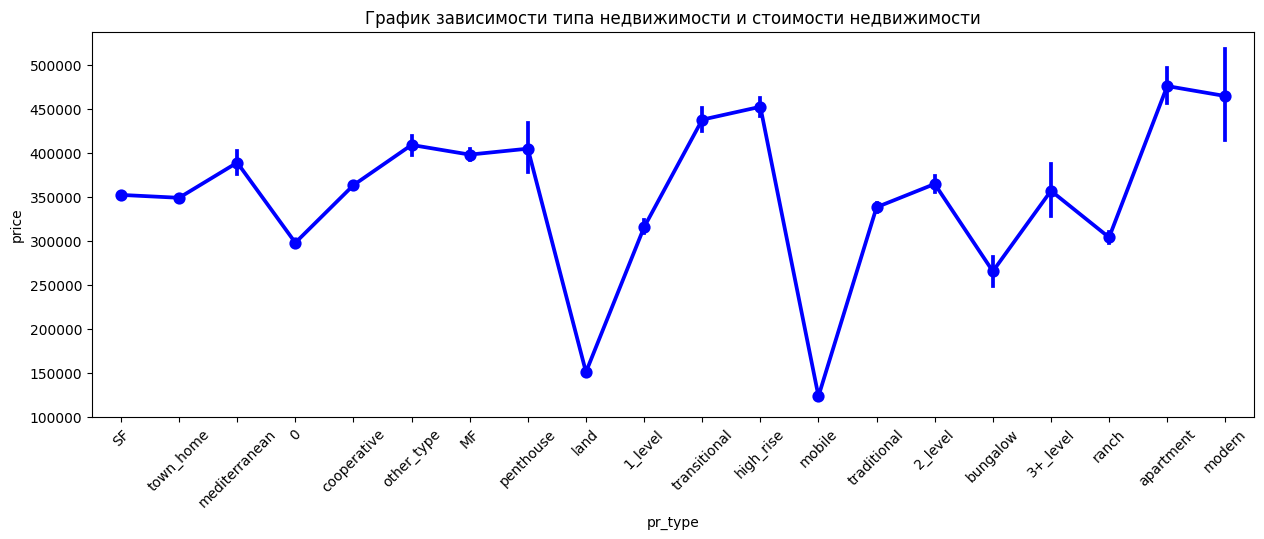

In [165]:
fig , axes = plt.subplots(1,1, figsize=(15,5)) 
price_school_rating = sns.pointplot(data = df_sale, 
                                  x= 'pr_type',
                                  y='price', 
                                  color = 'blue',)
axes.xaxis.set_tick_params(rotation = 45) 
axes.set_title('График зависимости типа недвижимости и стоимости недвижимости')

*Данны график показывает высокие цены у объектов типа квартир с современный ремонтом в высотках. Дома на несколько семей дороже одиночных, возможно связано с большей площадью. Дома одноэтажные немного ценятся ниже чем двух и трёх этажные. высоко оцениваются дома средиземноморского стиля.*

**Диаграмма зависимости площади недвижимости и её стоимости**

Text(0.5, 1.0, 'График зависимости площади недвижимости и её стоимости')

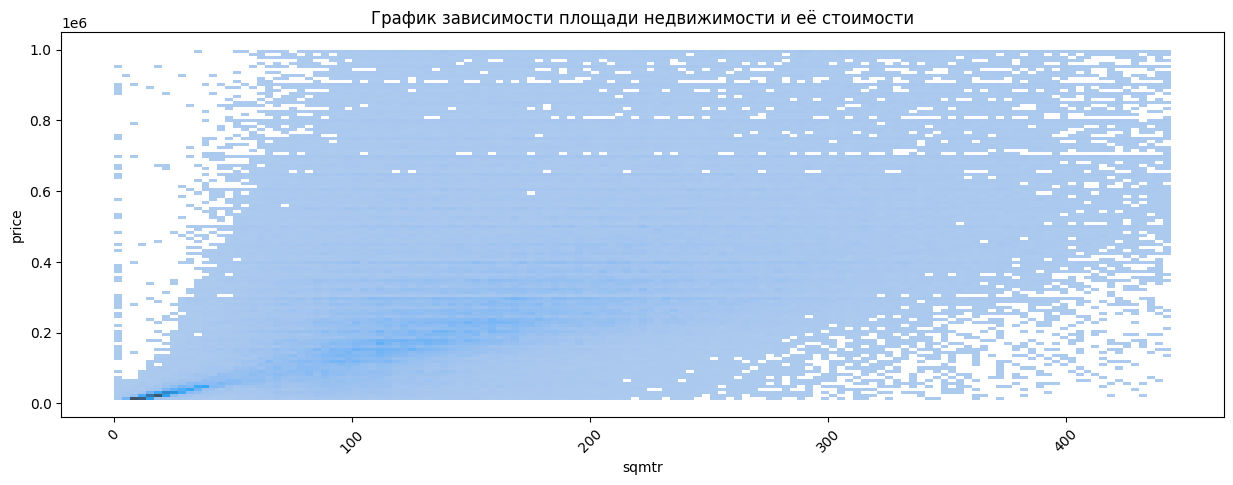

In [166]:
fig , axes = plt.subplots(1,1, figsize=(15,5)) 
price_school_rating = sns.histplot(data = df_sale, 
                                  x= 'sqmtr',
                                  y='price', 
                                  )
axes.xaxis.set_tick_params(rotation = 45) 
axes.set_title('График зависимости площади недвижимости и её стоимости')

На графике прослеживается тренд увеличения цены в зависимости от площади, пик роста зависимости до 100 кв.м. 
Есть объекты с небольшой площадью и высокой ценой. 

**Диаграмма зависимости рейтинга школы и стоимости недвижимости**

Text(0.5, 1.0, 'График зависимости рейтинга школы и стоимости недвижимости')

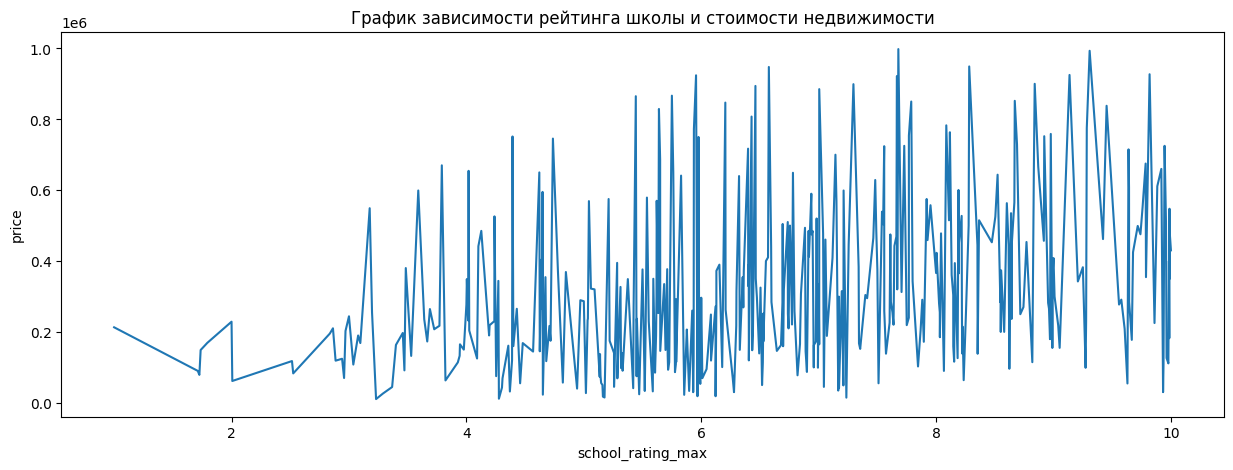

In [167]:
fig , axes = plt.subplots(1,1, figsize=(15,5)) 
price_school_rating = sns.lineplot(data = df_sale.groupby('school_rating_max')['price'].mean().reset_index(), 
                                  x= 'school_rating_max',
                                  y='price', 
                                  )

axes.set_title('График зависимости рейтинга школы и стоимости недвижимости')

*Чем выше рейтинг школы тем стоимость недвижимости выше. Рост тренда прослеживается до 6-8 рейтинга*

**Диаграмма зависимости степени (т.е возврат школьников) школы и стоимости недвижимости**

Text(0.5, 1.0, 'График зависимости рейтинга школы и стоимости недвижимости')

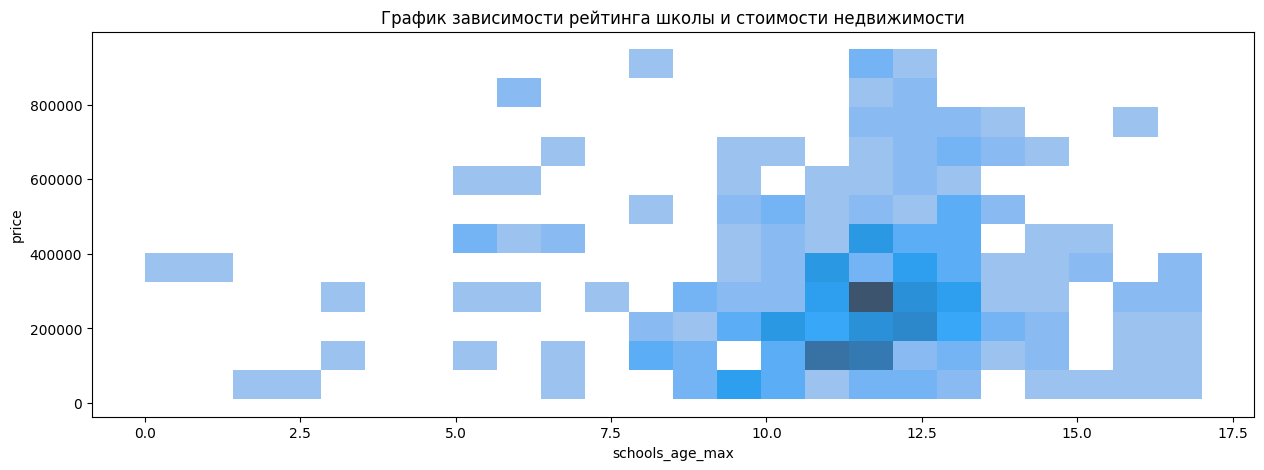

In [168]:
fig , axes = plt.subplots(1,1, figsize=(15,5)) 
price_school_age = df_sale.groupby( 'schools_age_max')['price'].mean().reset_index()
price_school_rating = sns.histplot(data =price_school_age , 
                                  x='schools_age_max',
                                  y = 'price', 
                                  )

axes.set_title('График зависимости рейтинга школы и стоимости недвижимости')

*Самая распространенная возрастная степень 10 - 12 лет, цены на недвижимость с такими школами выше.*

**Распространение недвижимости в зависимости от города**


Text(0.5, 1.0, 'График зависимости стоимости недвижимости от штата')

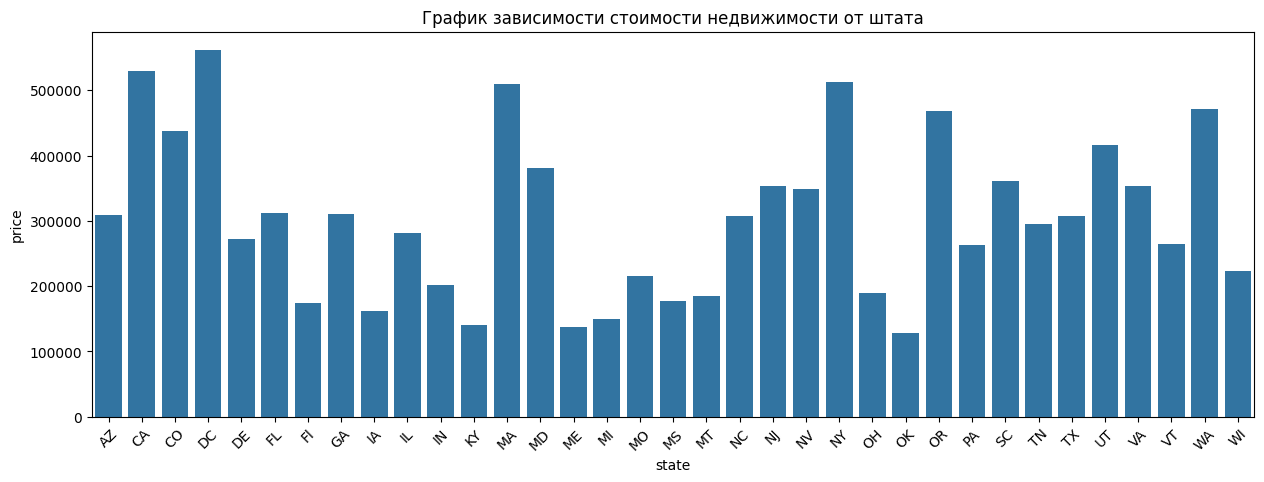

In [169]:
fig , axes = plt.subplots(1,1, figsize=(15,5)) 
pivot_city = df_sale.groupby('state')['price'].mean().reset_index()
city_100= sns.barplot(data = pivot_city, 
                       ax = axes,
                         x='state',
                         y='price')
axes.xaxis.set_tick_params(rotation = 45)

axes.set_title('График зависимости стоимости недвижимости от штата')

*Самые высокие цены недвижимости в: CA, DC, MA, NY, OR, UT, WA.*

*Самые низкие цены недвижимости в: FI, IA, KY, OK, MI, ME*

## **5. Отбор и преобразование признаков**

### **5.1 Вычисляем матрицу корреляции**

In [170]:
types = df_sale.dtypes
num_features = list(types[(types != 'object')].index)

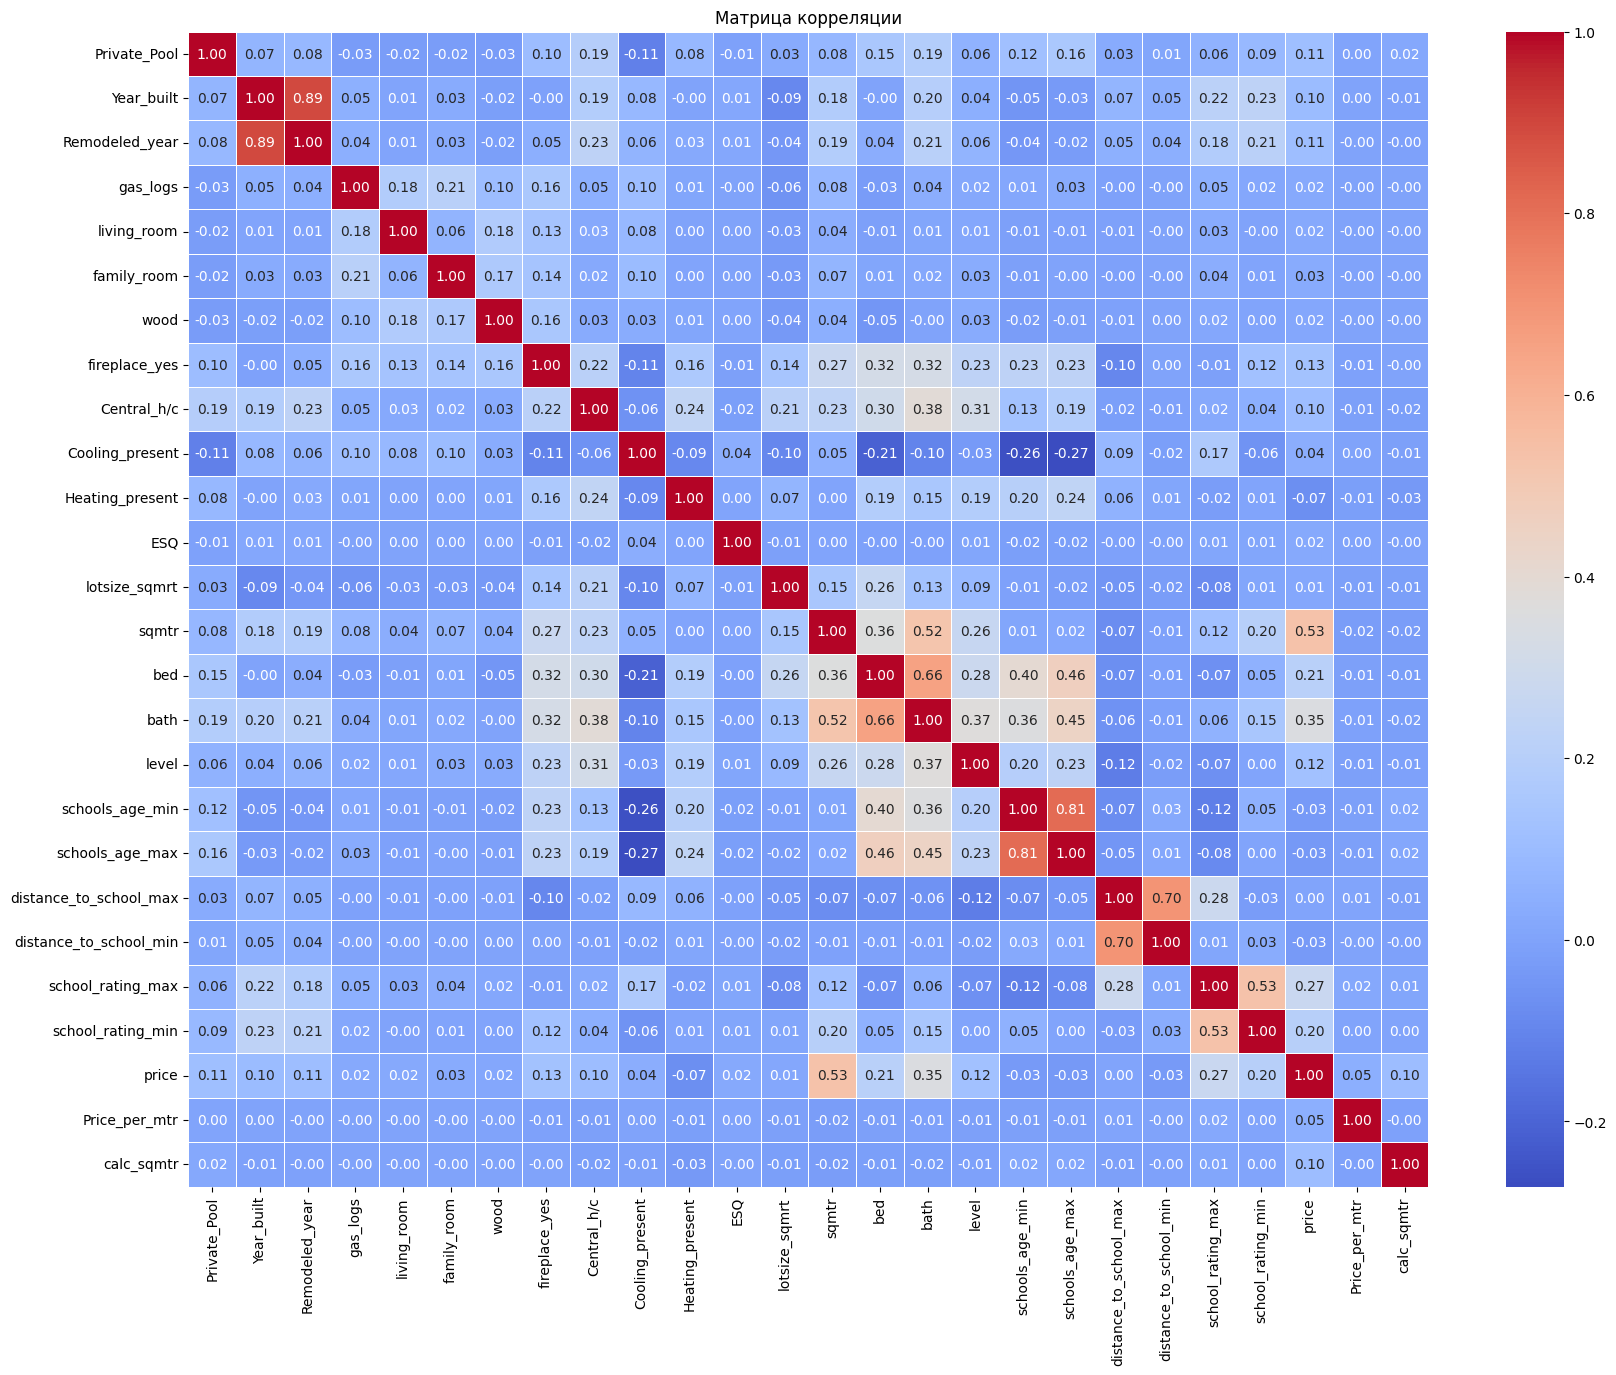

Самые сильные коррелирующие признаки:
Year_built       Remodeled_year     0.892350
Remodeled_year   Year_built         0.892350
schools_age_min  schools_age_max    0.811392
schools_age_max  schools_age_min    0.811392
dtype: float64


In [171]:
# Вычисляем матрицу корреляции
corr_matrix = df_sale[num_features].corr()
# Визуализация матрицы корреляции
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()
# Отбираем самые сильные коррелирующие признаки
threshold = 0.7 # Задаем пороговое значение корреляции
# Получаем значения корреляции, исключая диагональные элементы
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values != 1] #Исключаем корреляцию признака с самим собой
# Фильтруем признаки с корреляцией выше порогового значения
strong_correlations = corr_values[corr_values >= threshold]
print("Самые сильные коррелирующие признаки:")
print(strong_correlations)

In [172]:
# Удалим сильно коррелирующие признаки
df_sale = df_sale.drop(['schools_age_min', 'Remodeled_year', 'distance_to_school_max'], axis = 1)
df_sale.shape

(277745, 30)

Снова просмотрим матрицу корреляции после удаления сильно коррелирующих признаков

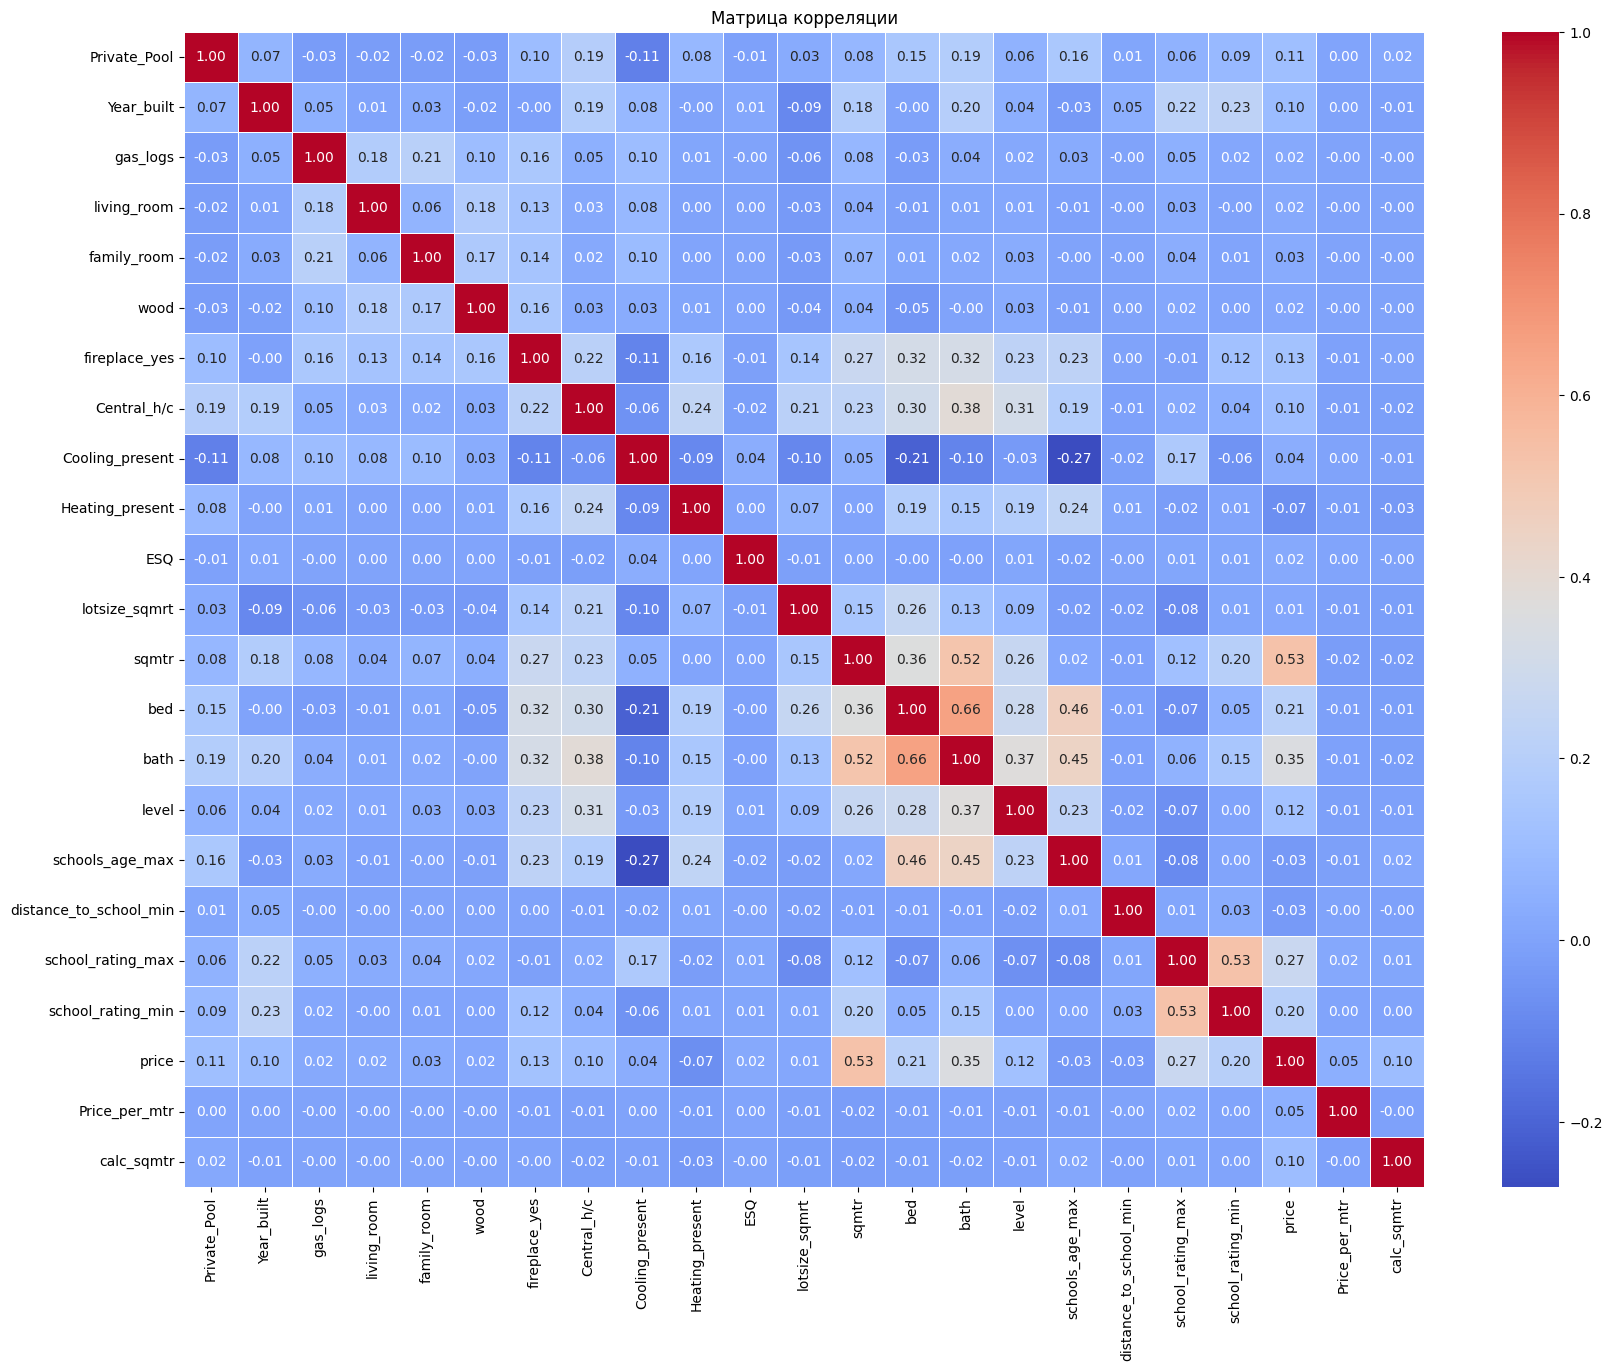

Самые сильные коррелирующие признаки:
Series([], dtype: float64)


In [173]:
# Вычисляем матрицу корреляции
corr_matrix = df_sale[list(df_sale.dtypes[(df_sale.dtypes != 'object')].index)].corr()
# Визуализация матрицы корреляции
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()
# Отбираем самые сильные коррелирующие признаки
threshold = 0.7 # Задаем пороговое значение корреляции
# Получаем значения корреляции, исключая диагональные элементы
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values != 1] #Исключаем корреляцию признака с самим собой
# Фильтруем признаки с корреляцией выше порогового значения
strong_correlations = corr_values[corr_values >= threshold]
print("Самые сильные коррелирующие признаки:")
print(strong_correlations)

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.

In [174]:
print('Shape of df: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))

Shape of df: (334872, 63)
Columns: Index(['index', 'status', 'propertyType', 'street', 'baths', 'homeFacts',
       'fireplace', 'city', 'schools', 'sqft', 'zipcode', 'beds', 'state',
       'stories', 'PrivatePool', 'MlsId', 'target', 'Private_Pool', 'Heating',
       'Cooling', 'Parking', 'lotsize', 'Price/sqft', 'Year_built',
       'Remodeled_year', 'gas_logs', 'living_room', 'family_room', 'wood',
       'fireplace_yes', 'Central_h/c', 'Cooling_present', 'Heating_present',
       'Type_of_heating', 'ESQ', 'Type_of_cooling', 'Parking_type',
       'lotsize_sqmrt', 'sqmtr', 'bed', 'bath', 'pr_type', 'city_mod',
       'city_top_100', 'level', 'schools_red', 'schools_mod', 'school_rating',
       'schools_grade', 'distance_to_school', 'schools_age', 'schools_age_min',
       'schools_age_max', 'distance_to_school_mil', 'distance_to_school_max',
       'distance_to_school_min', 'rating_ls', 'school_rating_max',
       'school_rating_min', 'price', 'price_per_month', 'Price_per_mtr',
 

### **5.2. Удаляем столбцы из списка list_for_drop**

In [175]:
# добавим столбци на
list_for_drop.append('city_top_100')
list_for_drop.append('calc_sqmtr')
list_for_drop.append('Price_per_mtr' )

In [176]:
for col in list_for_drop:
    if col in list(df_sale.columns):
        df_sale.drop(col, axis = 1, inplace=True)

In [177]:
data_sale = df_sale.copy()
data_sale.head()

,state,Private_Pool,Year_built,gas_logs,living_room,family_room,wood,fireplace_yes,Central_h/c,Cooling_present,...,bed,bath,pr_type,city_mod,level,schools_age_max,distance_to_school_min,school_rating_max,school_rating_min,price
0,NC,False,2019,True,False,False,False,1,0,0,...,4,3,SF,southern pines,0,17.00000,2.700000,7.00000,4.0000,418000
1,WA,False,2019,False,False,False,False,0,0,0,...,3,3,SF,spokane valley,2,17.00000,1.010000,4.00000,4.0000,310000
5,PA,False,1920,False,False,False,False,0,1,0,...,2,0,town_home,philadelphia,2,14.39375,0.252312,1.79375,1.0125,209000
6,FL,False,2006,False,False,False,False,0,1,0,...,0,0,mediterranean,poinciana,1,0.00000,0.800000,3.00000,1.0000,181500
7,TN,False,1976,False,False,False,False,0,0,0,...,0,0,0,memphis,0,0.00000,0.400000,4.00000,2.0000,68000


### **5.3 Произведем кодирование категориальных признаков**
 

В наше БД имеються категориальные признаки и порядковые, частично некоторые признаки были закодированы в процессе обработке признаков. Просмотрим список категориальных признаков, которые нобходимо закодировать.  

In [178]:
# присмотрим ранее созданные список объектных типов данных
obj_features = list( data_sale.dtypes[(data_sale.dtypes == 'object')].index)
obj_features

['state',
 'Type_of_heating',
 'Type_of_cooling',
 'Parking_type',
 'pr_type',
 'city_mod']

In [179]:
# Подсчитаем количестово уникальных занчений каждого категориального признака, даялее поределелимся методом кодирования
data_sale[obj_features].nunique().reset_index()

,index,0
0,state,35
1,Type_of_heating,23
2,Type_of_cooling,5
3,Parking_type,6
4,pr_type,20
5,city_mod,1682


Применим one_hot encoding: 
- Parking_type	
- pr_type	
- Type_of_cooling
- Type_of_heating


BinaryEncoder:  
- city_mod
- state 


In [180]:
#Производим кодирование one_hot encoding категориальных признаков
dummies_data = pd.get_dummies(data_sale, columns=['Parking_type', 'pr_type', 'Type_of_cooling', 'Type_of_heating'])
dummies_data.head()

,state,Private_Pool,Year_built,gas_logs,living_room,family_room,wood,fireplace_yes,Central_h/c,Cooling_present,...,Type_of_heating_pellet,Type_of_heating_propane,Type_of_heating_radiant,Type_of_heating_radiator,Type_of_heating_refrigeration,Type_of_heating_solar,Type_of_heating_steam,Type_of_heating_wall,Type_of_heating_wood,Type_of_heating_zoned
0,NC,False,2019,True,False,False,False,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,WA,False,2019,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False
5,PA,False,1920,False,False,False,False,0,1,0,...,False,False,False,False,False,False,False,False,False,False
6,FL,False,2006,False,False,False,False,0,1,0,...,False,False,False,False,False,False,False,False,False,False
7,TN,False,1976,False,False,False,False,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [181]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder()
city_bin = bin_encoder.fit_transform(data_sale[['city_mod', 'state']])
dummies_data = pd.concat([dummies_data , city_bin], axis=1)
dummies_data 

,state,Private_Pool,Year_built,gas_logs,living_room,family_room,wood,fireplace_yes,Central_h/c,Cooling_present,...,city_mod_7,city_mod_8,city_mod_9,city_mod_10,state_0,state_1,state_2,state_3,state_4,state_5
0,NC,False,2019,True,False,False,False,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,WA,False,2019,False,False,False,False,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,PA,False,1920,False,False,False,False,0,1,0,...,0,0,1,1,0,0,0,0,1,1
6,FL,False,2006,False,False,False,False,0,1,0,...,0,1,0,0,0,0,0,1,0,0
7,TN,False,1976,False,False,False,False,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335242,TX,False,1993,False,False,False,False,1,1,0,...,0,1,0,0,0,0,0,1,1,1
335243,TX,False,1905,False,False,False,False,0,0,0,...,0,0,1,0,0,0,0,1,1,1
335244,CA,True,1950,False,False,False,False,0,1,0,...,1,0,0,0,0,0,1,0,0,1
335245,CO,False,2016,False,False,False,False,0,1,0,...,1,0,0,1,0,1,0,1,1,0


In [182]:
# удалим закодированные признаки
dummies_data.drop(['city_mod', 'state'], axis=1,inplace = True)

Снова вычислим матрицу корреляции после кодирование категориальных признаков

In [183]:
# Вычисляем матрицу корреляции
corr_matrix = dummies_data[list(dummies_data.dtypes[(dummies_data.dtypes != 'object')].index)].corr()

# Отбираем самые сильные коррелирующие признаки
threshold = 0.7 # Задаем пороговое значение корреляции
# Получаем значения корреляции, исключая диагональные элементы
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values != 1] #Исключаем корреляцию признака с самим собой
# Фильтруем признаки с корреляцией выше порогового значения
strong_correlations = corr_values[corr_values >= threshold]
print("Самые сильные коррелирующие признаки:")
print(strong_correlations)

Самые сильные коррелирующие признаки:
Type_of_cooling_air  Type_of_cooling_0      0.89014
Type_of_cooling_0    Type_of_cooling_air    0.89014
dtype: float64


In [184]:
# удалим сильно корелирущие признаки признаки

dummies_data.drop('Type_of_cooling_0', axis = 1, inplace=True)

dummies_data.shape

(277745, 91)

In [185]:
# Вычисляем матрицу корреляции
corr_matrix = dummies_data[list(dummies_data.dtypes[(dummies_data.dtypes != 'object')].index)].corr()

# Отбираем самые сильные коррелирующие признаки
threshold = 0.7 # Задаем пороговое значение корреляции
# Получаем значения корреляции, исключая диагональные элементы
corr_values = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_values = corr_values[corr_values != 1] #Исключаем корреляцию признака с самим собой
# Фильтруем признаки с корреляцией выше порогового значения
strong_correlations = corr_values[corr_values >= threshold]
print("Самые сильные коррелирующие признаки:")
print(strong_correlations)

Самые сильные коррелирующие признаки:
Series([], dtype: float64)


### **5.4 Произведем исследование логарифмированых распределений на наличие вбросов с помощью метода 3 сигм**

Иследуем распредение признаков, переведем целевой признак из логнормального распредения в нормальное с помощью лонгирования 

#### **5.4.1 Исследуем распределение признак year, переведем целевой признак из логнормального распределения в нормальное с помощью лонгирования** 

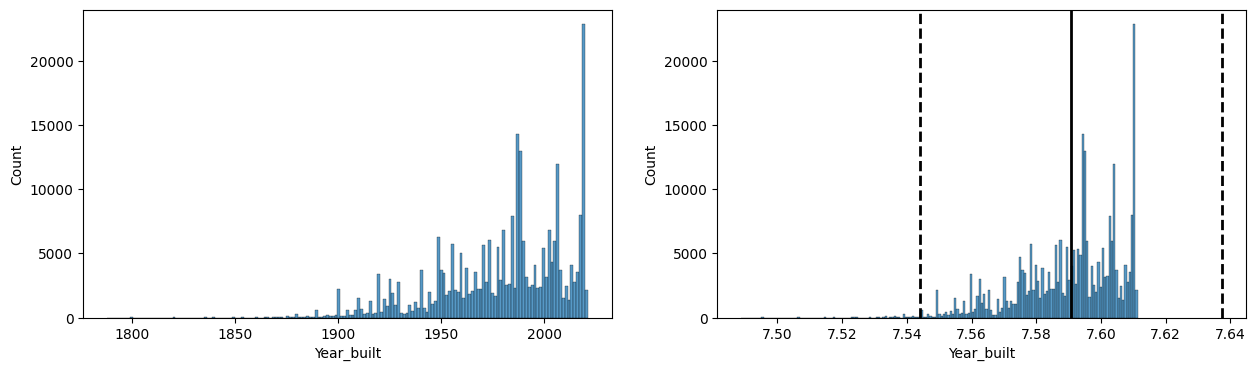

In [186]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + координатная плоскость
#Строим гистограмму
sns.histplot(data=dummies_data, x='Year_built', ax=axes[0]);
#Логарифмируем
log_price = np.log(dummies_data['Year_built'])
#Строим гистограмму в логарифмическом масштабе
sns.histplot(data=log_price, ax=axes[1]);
#Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+ 3 *log_price.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean()- 3 *log_price.std(),
                color='k', ls='--', lw=2);

#### **5.4.2 Исследуем распределение признака distance_to_school_min, переведем целевой признак из логнормального распределения в нормальное с помощью лонгирования** 

c:\Users\Maksym\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Maksym\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


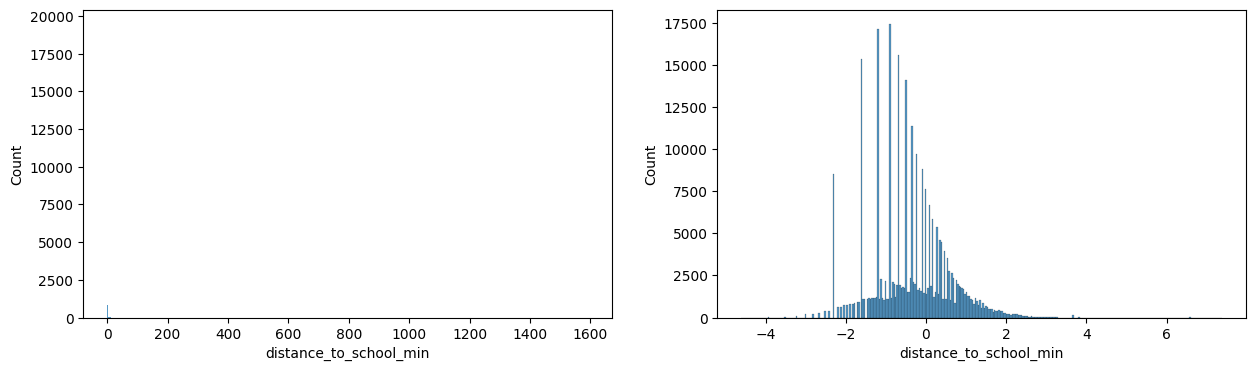

In [187]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + координатная плоскость
#Строим гистограмму
sns.histplot(data=dummies_data, x='distance_to_school_min', ax=axes[0]);
#Логарифмируем
log_price = np.log(dummies_data['distance_to_school_min'])
#Строим гистограмму в логарифмическом масштабе
sns.histplot(data=log_price, ax=axes[1]);
#Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+ 3 *log_price.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean()- 3 *log_price.std(),
                color='k', ls='--', lw=2);

#### **5.4.3 Исследуем распределение признака sqmtr, переведем целевой признак из логнормального распределения в нормальное с помощью лонгирования** 

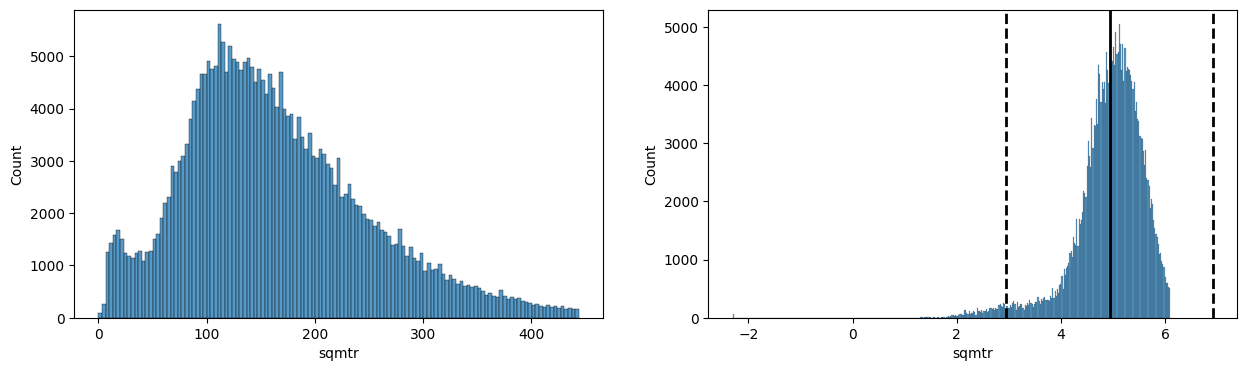

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + координатная плоскость
#Строим гистограмму
sns.histplot(data=dummies_data, x='sqmtr', ax=axes[0]);
#Логарифмируем
log_price = np.log(dummies_data['sqmtr'])
#Строим гистограмму в логарифмическом масштабе
sns.histplot(data=log_price, ax=axes[1]);
#Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+ 3 *log_price.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean()- 3 *log_price.std(),
                color='k', ls='--', lw=2);

#### **5.4.4 Исследуем распределение признака lotsize_sqmrt, переведем целевой признак из логнормального распределения в нормальное с помощью лонгирования**  

c:\Users\Maksym\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\Maksym\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


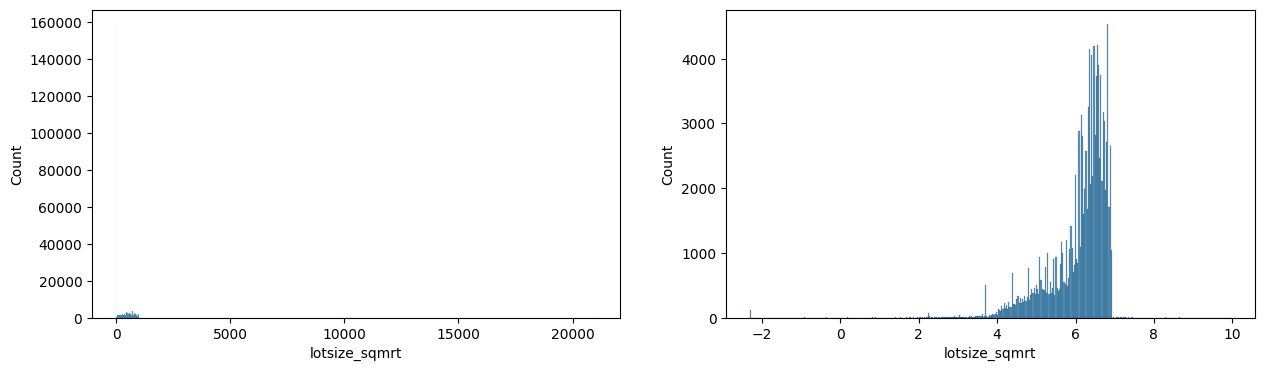

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4)) #фигура + координатная плоскость
#Строим гистограмму
sns.histplot(data=dummies_data, x='lotsize_sqmrt', ax=axes[0]);
#Логарифмируем
log_price = np.log(dummies_data['lotsize_sqmrt'])
#Строим гистограмму в логарифмическом масштабе
sns.histplot(data=log_price, ax=axes[1]);
#Добавляем вертикальные линии для среднего и 3ех стандартных отклонений влево и вправо от среднего
axes[1].axvline(log_price.mean(), color='k', lw=2)
axes[1].axvline(log_price.mean()+ 3 *log_price.std(),
                color='k', ls='--', lw=2)
axes[1].axvline(log_price.mean()- 3 *log_price.std(),
                color='k', ls='--', lw=2);

#### **5.4.5 Избавимся от вбросов с помощью метода z-отклонений на логарифмированных признаках.** 

In [190]:
# Избавимся от пропусков
dummies_data.dropna()

,Private_Pool,Year_built,gas_logs,living_room,family_room,wood,fireplace_yes,Central_h/c,Cooling_present,Heating_present,...,city_mod_7,city_mod_8,city_mod_9,city_mod_10,state_0,state_1,state_2,state_3,state_4,state_5
0,False,2019,True,False,False,False,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,False,2019,False,False,False,False,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,False,1920,False,False,False,False,0,1,0,1,...,0,0,1,1,0,0,0,0,1,1
6,False,2006,False,False,False,False,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
7,False,1976,False,False,False,False,0,0,0,0,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335242,False,1993,False,False,False,False,1,1,0,1,...,0,1,0,0,0,0,0,1,1,1
335243,False,1905,False,False,False,False,0,0,0,1,...,0,0,1,0,0,0,0,1,1,1
335244,True,1950,False,False,False,False,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1
335245,False,2016,False,False,False,False,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0


In [191]:
#Объявляем функцию, реализующую фильтрацию выбросов по методу z-отклонений
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned
#Производим очистку 
outliers, data_cleaned = outliers_z_score(dummies_data, 'price', log_scale=True)
outliers, data_cleaned = outliers_z_score(data_cleaned, 'Year_built', log_scale=True)
outliers, data_cleaned = outliers_z_score(data_cleaned, 'sqmtr', log_scale=True)


print('Shape before cleaning outliers: {}'.format(dummies_data.shape))
print('Shape after cleaning outliers: {}'.format(data_cleaned.shape))

Shape before cleaning outliers: (277745, 91)
Shape after cleaning outliers: (268275, 91)


## **6. Моделирование + Оценка модели**

Заранее создадим функцию, которая будет расчитывать метрики:

1. MAE - средняя абсолютная ошибка (целевая метрика)
2. MAPE - средняя абсолютная ошибка в процентах 
3. $R^2$ - коэффициент детерминации 

In [192]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_predict))))
    print('\n')

    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.3f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))
    print('Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_predict))))



Создадим словарь для сохранения меток


In [193]:
ml_metrics = {}

Начинаем с целевого признака. Основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак цены и рассматривать при анализе логарифм в качестве целевого признака:
$$price\_log = log(price+1),$$
где под символом log подразумевается натуральный логарифм.

In [194]:
dummies_data['price_log'] = np.log(dummies_data['price']+1)

### **6.1 Разделим нашу выборку на train и test**

Cформируем матрицу наблюдений X, вектор целевой переменной y. 


In [195]:
X = dummies_data.drop(['price', 'price_log'], axis=1)
y = dummies_data['price']
y_log = dummies_data['price_log']

Применим метод валидации данных hold-out. Разобьем выборку на обучающую и валидационную в соотношении 80/20:

In [196]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_log, test_size=0.2, random_state=42)


На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


###  **6.2 Отберём 25 признаков**
С помощью SelectKBest отберём 25 признаков, наилучшим образом подходящих для предсказания целевой переменной. Отбор реализуем по обучающей выборке, используя параметр score_func = f_regression.




In [197]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k =25)
selector.fit(X_train, y_train)

best_features = selector.get_feature_names_out().tolist()
# X_train = X_train[best_features]
# X_test = X_test[best_features]


In [198]:
best_features

['Private_Pool',
 'Year_built',
 'fireplace_yes',
 'Central_h/c',
 'Cooling_present',
 'lotsize_sqmrt',
 'sqmtr',
 'bed',
 'bath',
 'level',
 'school_rating_max',
 'school_rating_min',
 'Parking_type_False',
 'Parking_type_garage',
 'Parking_type_parking',
 'pr_type_0',
 'pr_type_SF',
 'pr_type_cooperative',
 'pr_type_land',
 'pr_type_mobile',
 'Type_of_heating_0',
 'Type_of_heating_air',
 'city_mod_7',
 'state_2',
 'state_3']

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


###  **6.3 Нормализуем данные**
Нормализуем предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. 




In [199]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Рассчитаем среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. 

In [200]:
round(X_train_scaled.iloc[:,0].mean(), 2)

0.09

### **6.4 Решение задачи регрессии: линейная регрессия**

In [201]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train_scaled, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь
ml_metrics['Линейная регрессия'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),
                                   'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics

Train R^2: 0.533
Train MAE: 0.446
Train MAPE: 3.682
Train RMSLE: 0.587


Test R^2: 0.534
Test MAE: 0.446
Test MAPE: 3.677
Test RMSLE: 0.586


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586']}

#### **6.5 Линейная регрессия с L2-регуляризацией**

Попробуем добавить в данные полиномиальные признаки и построить модель полиномиальной регрессии. Предварительно нормализуем данные:

In [202]:
#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь
ml_metrics['Линейная регрессия с L2-регуляризацией'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics

Train shape: (222196, 4185)
Test shape: (55549, 4185)


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586'],
 'Линейная регрессия с L2-регуляризацией': ['Train RMSLE: 0.587',
  'Test RMSLE: 0.586']}

### **6.6 Решение задачи регрессии: деревья решений** 


Построим модель дерева решений (DecisionTreeRegressor) на обучающей выборке. Все параметры оставим по умолчанию. 

Для полученной модели рассчитаем метрику RMSLE на тренировочной и валидационной выборках. Ответ округлим до сотых.


In [205]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42, max_depth=5)
dtr.fit(X_train_scaled, y_train)
y_train_pred = dtr.predict(X_train_scaled)
y_valid_pred = dtr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь

ml_metrics['Деревья решений'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics

Train R^2: 0.542
Train MAE: 0.434
Train MAPE: 3.550
Train RMSLE: 0.581


Test R^2: 0.534
Test MAE: 0.446
Test MAPE: 3.677
Test RMSLE: 0.586


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586'],
 'Линейная регрессия с L2-регуляризацией': ['Train RMSLE: 0.587',
  'Test RMSLE: 0.586'],
 'Деревья решений': ['Train RMSLE: 0.581', 'Test RMSLE: 0.586']}

####   **6.6.1 Переберём все возможные варианты глубины дерева решений в диапазоне от 7 до 20:**


max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Построим линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдём оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

Для полученной модели рассчитаем метрику RMSLE на тренировочной и валидационной выборках. Ответ округлим до сотых.


In [206]:
max_depths = range(2,20)
train_score = []
valid_score = []
depth_tree=[]
for depth in max_depths:
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dtr.fit(X_train_scaled, y_train)
    y_train_pred = dtr.predict(X_train_scaled)
    y_test_pred = dtr.predict(X_test_scaled)
    train_score.append(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
    valid_score.append(np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))
    depth_tree.append(depth)

Построим линейные графики изменения метрики R2-score на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений.

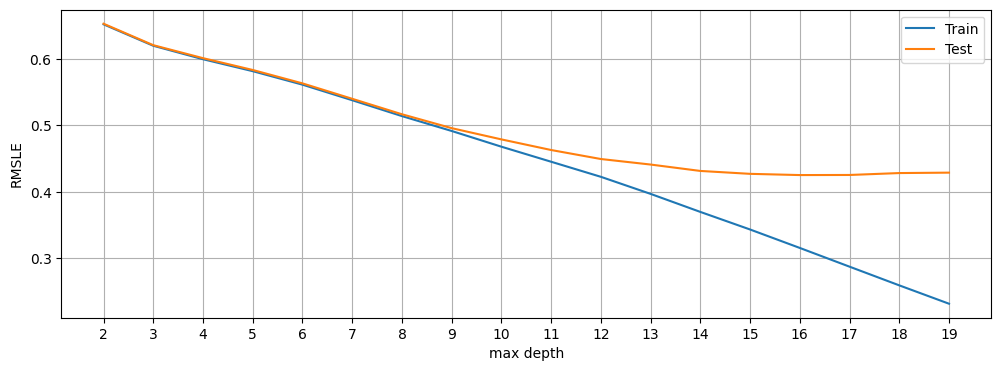

In [207]:
fig, ax = plt.subplots(figsize =(12,4))
ax.plot(depth_tree, train_score, label = 'Train')
ax.plot(depth_tree, valid_score, label= 'Test')
ax.set_xlabel('max depth')
ax.set_ylabel('RMSLE')
ax.set_xticks(max_depths)
ax.grid()
ax.legend()

&rarr;  Оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом ещё не будет наблюдаться переобучение (валидационная кривая ещё не начинает возрастать), соответствует max_depth max_depth = 15.

Обучим модель с оптимальным значением максимальной глубины дерева.

In [208]:
dtr = DecisionTreeRegressor(max_depth=15, random_state=42)
dtr.fit(X_train_scaled, y_train)
y_train_pred = dtr.predict(X_train_scaled)
y_test_pred = dtr.predict(X_test_scaled)


#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь

ml_metrics['Деревья решений_оптимальные параметры'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics


Train R^2: 0.840
Train MAE: 0.238
Train MAPE: 1.935
Train RMSLE: 0.343


Test R^2: 0.752
Test MAE: 0.292
Test MAPE: 2.380
Test RMSLE: 0.427


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586'],
 'Линейная регрессия с L2-регуляризацией': ['Train RMSLE: 0.587',
  'Test RMSLE: 0.586'],
 'Деревья решений': ['Train RMSLE: 0.581', 'Test RMSLE: 0.586'],
 'Деревья решений_оптимальные параметры': ['Train RMSLE: 0.343',
  'Test RMSLE: 0.427']}

&rarr; Модель дерева решений с оптимальным значением глубины показало наилучший результат метрики.

### **6.7 Решение задачи регрессии: ансамблевые методы и построение прогноза**



#### **6.7.1 Построим модель случайного леса на обучающей выборке.**
В качестве гиперпараметров укажим следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитаем метрику r2-score на тренировочной и валидационной выборках. Ответ округлим до сотых.


In [209]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    n_jobs=-1
)

rfr.fit(X_train_scaled,y_train)
y_train_pred = rfr.predict(X_train_scaled)
y_valid_pred = rfr.predict(X_test_scaled)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь
ml_metrics['Случайный лес'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),
                                   'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics

Train R^2: 0.791
Train MAE: 0.284
Train MAPE: 2.321
Train RMSLE: 0.393


Test R^2: 0.752
Test MAE: 0.292
Test MAPE: 2.380
Test RMSLE: 0.427


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586'],
 'Линейная регрессия с L2-регуляризацией': ['Train RMSLE: 0.587',
  'Test RMSLE: 0.586'],
 'Деревья решений': ['Train RMSLE: 0.581', 'Test RMSLE: 0.586'],
 'Деревья решений_оптимальные параметры': ['Train RMSLE: 0.343',
  'Test RMSLE: 0.427'],
 'Случайный лес': ['Train RMSLE: 0.393', 'Test RMSLE: 0.427']}

&rarr; Благодаря параллельному обучению нескольких деревьев, модель случайного леса не дала нам прирост качества по сравнению с обычным деревом решений.

#### **6.7.2 Построим модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке.**
 В качестве гиперпараметров укажим следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитаем метрику на тренировочной и валидационной выборках. Ответ округлим до сотых.


Посмотрим, что будет при последовательном ансамблировании.

In [210]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42
)

gbr.fit(X_train_scaled,y_train)
y_train_pred = gbr.predict(X_train_scaled)
y_test_pred = gbr.predict(X_test_scaled)

#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)
# Запишем результат в словарь
ml_metrics['Градиентный бустинг над деревьями решений'] = ['Train RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))),
                                   'Test RMSLE: {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))]
ml_metrics


Train R^2: 0.864
Train MAE: 0.229
Train MAPE: 1.867
Train RMSLE: 0.317


Test R^2: 0.839
Test MAE: 0.244
Test MAPE: 1.992
Test RMSLE: 0.344


{'Линейная регрессия': ['Train RMSLE: 0.587', 'Test RMSLE: 0.586'],
 'Линейная регрессия с L2-регуляризацией': ['Train RMSLE: 0.587',
  'Test RMSLE: 0.586'],
 'Деревья решений': ['Train RMSLE: 0.581', 'Test RMSLE: 0.586'],
 'Деревья решений_оптимальные параметры': ['Train RMSLE: 0.343',
  'Test RMSLE: 0.427'],
 'Случайный лес': ['Train RMSLE: 0.393', 'Test RMSLE: 0.427'],
 'Градиентный бустинг над деревьями решений': ['Train RMSLE: 0.317',
  'Test RMSLE: 0.344']}

**&rarr;** Модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) показало лучший результат метрик

### **6.8. Построим столбчатую диаграмму коэффициентов значимости каждого из факторов.**

Укажим топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


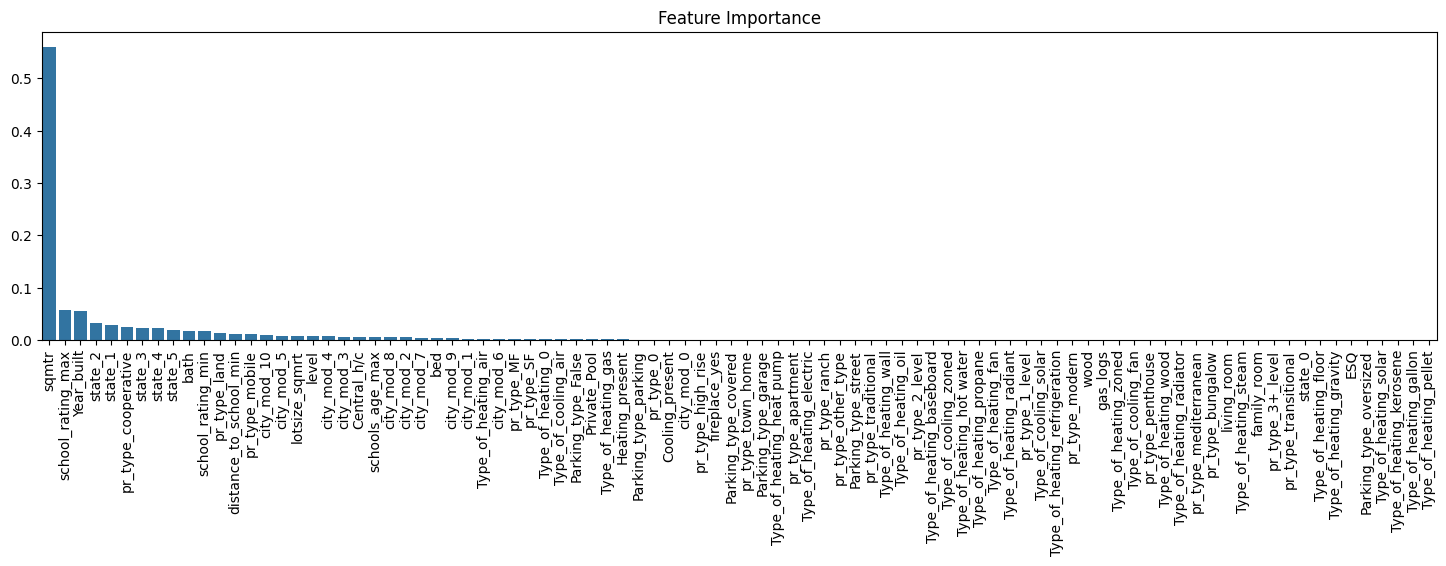

In [212]:
df = pd.DataFrame({'feature': gbr.feature_names_in_, 
                   'importance': gbr.feature_importances_}).sort_values(by='importance', ascending=False)

fig, ax = plt.subplots(figsize = (18, 4))
sns.barplot(df, x='feature', y='importance')
ax.set_title('Feature Importance')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(rotation=90)

&rarr; Топ-3 факторов, наиболее значимых для предсказания целевого признака (цены объекта) в логарифмическом масштабе: 
* sqmtr
* school_rating_max
* Year_built

###   **6.9 Интерпретация предсказания**

Несмотря на все преимущества, у метрики RMSLE  есть один недостаток — она не является интерпретируемой. Нам хотелось бы понять, насколько наша итоговая модель хорошо предсказывает целевой признак с точки зрения бизнес-процесса. Точнее, мы бы хотели получить более понятное представление об ошибке прогноза.

Для лучшей из построенных моделей рассчитаем медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания цены объекта на тестовой выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

In [214]:
# переводим значения из логарифмического масштаба в истинный
y_test_exp = np.exp(y_test) - 1
y_test_pred_exp = np.exp(y_test_pred) - 1

print(f'Valid MeAE: {(metrics.median_absolute_error(y_test_exp, y_test_pred_exp)/60).round(1)} $')



Valid MeAE: 766.4 $


###   **7 Вывод**

Модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) показало лучший результат метрик, Train RMSLE: 0.317 / Test RMSLE: 0.344, ошибка составляет в среднем 766.4 $.
Топ-3 факторов, наиболее значимых для предсказания:
* sqmtr
* school_rating_max
* Year_built








***Код для создания requirements-файла:***

In [217]:
!pip freeze > requirements.txt

_______